
# Sheng Guardrails Project

## Introduction

In Kenya, Sheng, an evolving informal language that fuses Swahili and English, is widely used, especially among the youth. While this linguistic hybrid fosters cultural expression and social cohesion, it poses significant challenges for Natural Language Processing (NLP) systems trained predominantly on standard English.

Current chatbot models, and other service providers provide In-Topic (IT) guardrails to determine whether user queries fall within predefined subject boundaries. However, these models often have limited linguistic comprehension for low resource languages such as Sheng due to limited training data and insufficient linguistic representation. This leads to poor topic classification, decreased user trust, and reduced overall utility of AI-driven services in underrepresented communities.

## Objective

The goal of this project is to explore model options that can classify text and ensure that generative AI systems respond only with vetted, contextually relevant content, thereby enhancing both the accuracy and safety of conversational AI in with low resource languages.

## Approach
There are 5 main areas in this document:

1.   Pre-processing: This is where the imports, and helper functions are domiciled.The purpose is to optimize reusable code for the sections that follow next.
2.   Understanding the data set: This contains the description of the datasets being used across the experiments. It is predominantly what has been availed by Girl effect, however, in this section you can swap to your intended low resource languages.
3. Experiments: This section will be further sub divided into 2 large experiments.
This section will be divided into two main experiments.
The first experiment focuses on small datasets, tested across four different approaches (tracks), with the aim of identifying which approach achieves the highest accuracy and F1 score. The tracks are:
*   Track 1: The use of cosine similarity and traditional classifiers for a decision boundary using kmeans, logistic regression and Random Forest.
* Track 2: Multilingual Embedding Model Evaluation which explored the applicability of multilingual and cross-lingual models to the classification task.
* Track 3: Few-Shot Learning with OpenAI by Providing Labeled Examples in the Prompt for Direct Classification
* Track 4: Translation and Embedding via OpenAI, followed by classification with logistic regression.

The second experiment builds on Few-Shot Learning with OpenAI using 2 different prompts and 2 different openAI models () and comparing results to benchmark our first experiment. The objective is to assess whether the traditional models can perform as well as the modern OpenAI models.

## Results and Analysis
### Track 1:
In the first track, several sentence embedding models were used -  all-mpnet-base-v2, all-MiniLM-L6-v2 and text-embedding-3-large. The objectives are: 1) the effect of embedding model choice, and (2) the efficacy of different classifiers (logistic regression, k-means, and random forest) in establishing decision boundaries.

On the embedding comparison, the embedding models,all-mpnet-base-v2 and all-MiniLM-L6-v2, yielded similar cosine similarity distributions, with hardly any impact observed on the subsequent classification task. However, the distribution of text-embedding-3-large seemed more with no display of normality. However, it produced the highest accuracy and F1-scores across classifiers, especially with Logistic Regression and Random Forest.There was significant overlap in prediction classes classes. This indicates that the semantic meanings in Sheng across both IT and OOT classes are close to each other that it limits the ability of the classification models to determine a concise decision boundary.
| Classifier              | Accuracy (mpnet / MiniLM / 3-large) | F1-score (mpnet / MiniLM / 3-large) | ROC-AUC (mpnet / MiniLM / 3-large) |
| ----------------------- | ----------------------------------- | ----------------------------------- | ---------------------------------- |
| **Logistic Regression** | 0.79 / 0.78 / 0.84                  | 0.88 / 0.88 / 0.90                  | 0.55 / 0.55 / 0.65                 |
| **K-means**             | 0.33 / 0.44 / 0.73                  | 0.50 / 0.29 / 0.80                  | 0.78 / 0.80 / 0.21                 |
| **Random Forest**       | 0.83 / 0.81 / 0.84                  | 0.89 / 0.88 / 0.90                  | 0.81 / 0.73 / 0.75                 |



On the classification task performance, Random Forest performs consistently well across all embeddings, especially with F1-score (up to 0.90) and ROC-AUC (up to 0.81) indicating a strong balance between precision and recall and a good ability to distinguish classes. While K-means with text-embedding-3-large surprisingly shows decent F1-score (0.80) and accuracy (0.73), its ROC-AUC is very poor (0.21) highlighting that it's not consistently distinguishing between classes, despite some surface-level performance. Thus Random forest with AUC of >70% and accuracy/f1 scores >81%  implies a good useable model, while K-means and LR need more improvement.

### Track 2:

This track explored an additional NLP multi-lingual models ( Davlan/afro-xlmr-mini, facebook/contriever, facebook/msmarco, sentence-transformers/LaBSE, xlm-roberta-base). Despite trying several of these models the perfomance remained low at between 43% and 56% on the higher side. While these models are well trained for multilingual tasks, their performance on this dataset suggests limitations in effectively capturing the nuances of Sheng.facebook/contriever is the only model showing meaningful learning in this setup. There was no fine-tuning used to durther investigate the efficacy of these models to the classification task, hence the results are limited and should not be used to infer any performance.

Comparison table:

| Model    | Validation loss | Accuracy | F1 score |
| -------- | ------- | ------- | ------- |
| Davlan/afro-xlmr-mini  |0.740749  | 0.500000 | 0.333333
| facebook/msmarco | 1.381521   | 0.500000 | 0.333333 |
| facebook/contriever | 0.651121 | 0.562500 | 0.458937 |
| xlm-roberta-base| 0.707880 | 0.500000 | 0.333333 |
| sentence-transformers/LaBSE| 0.959065 | 0.500000 | 0.333333 |

### Track 3:

This track used OpenAI's gpt-3.5-turbo-instruct and gpt-4o-mini with a few shot prompting approach where some samples were included in the prompt as examples for the classification task. gpt-4o-mini Outperforms across all metrics. It shows a better balance between precision and recall (F1 = 0.835) and higher AUC score(0.86), making it more reliable overall..

| Metric        | gpt-4o-mini | gpt-3.5-turbo-instruct |
| ------------- | ----------- | ---------------------- |
| **Accuracy**  | 0.833       | 0.7430                 |
| **F1 Score**  | 0.835       | 0.7436                 |
| **AUC Score** | 0.86        | 0.73                   |

Comparing gpt-4o-mini vs Random Forest using text-embedding-3-large
Accuracy is nearly identical, with Random Forest clearly exceeding in the F1 score at 90% thus it is better in addressing class imbalance. However, GPT-4o-mini is better at distinguishing between classes across thresholds with the AUC score at 86%. This is further supported because gpt-4o-mini has better text understanding, handling of ambiguity and is highly adaptable given the large copra of data it is trained on. Random Forest on the other hand can be useful where there is structured data, constrains by cost or infrastructure, and there is desire for a transparent, and interpretable model.

| Metric   | **gpt-4o-mini** | **Random Forest (3-large)** |
| -------- | --------------- | --------------------------- |
| Accuracy | 0.833           | 0.84                        |
| F1 Score | 0.835           | 0.90                        |
| ROC-AUC  | 0.86            | 0.75                        |


### Track 4:

This track explored whether translating Sheng text to English could improve classification outcomes. Openai was used for translation and embeddings using it's text-embedding-3-large model. Notably, the embeddings were more skewed to the left, differentiating the openAI embeddings from the previous embedding models. Despite the classification inconsitencies experienced in track 1, logistic regression was used to define a decision boundary. The translated dataset were used as vocabulary embeddings, and logistic regression applied. However, performance was poor with an accuracy of 0.4375 and F1 score of 0.4705. Given the previous track results, further translation experiments on translations were not pursued.


## Conclusion
Random Forest emerges as a highly effective alternative to the classification task given its performance was comparable to modern models frrom OpenAI.Although the sentence embedding and classifier pipelines demonstrated that the underlying data is not linearly separable, Random Forest was able to define a decision boundary through the ambiguity with casualties in False negatives and false positives, hence there is a trade off. A Large language model like GPT-4 can generate flexible, non-linear reasoning paths within current context making them more perfoemant for noisy, overlapping datasets of which Random Forest cannot beat.


# Pre-processing

## **1. Install the required libraries**

In [15]:
!pip install sentence-transformers
!pip install scikit-learn
!pip install datasets

## **2. Load the libraries that are already installed**

In [16]:
import pandas as pd
import numpy as np
import os
import csv
import io, json
import seaborn as sns
import matplotlib.pyplot as plt

from openai import OpenAI
from datasets import Dataset
from sentence_transformers import SentenceTransformer

from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers import AutoModel,AutoModelForTokenClassification, TFAutoModelForSequenceClassification
from transformers import Trainer, TrainingArguments

from sklearn.model_selection import train_test_split
from sklearn.metrics import  accuracy_score, f1_score, classification_report,roc_curve, auc, RocCurveDisplay, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier
from scipy.special import softmax

## **3. Attach google drive**

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Helper Functions

These are functions that can be repeated to help make calculate, write and retrieve information etc...

### **1. Functions for processing files and different file formats**

In [18]:
def save_list_to_csv(data, filename="drive/MyDrive/ColabNotebooks/GirlEffect/sheng_project/data/translated_content/translated_texts.csv"):
# For Saving translations to file
    try:
        with open(filename, 'w', newline='', encoding='utf-8') as csvfile:
            writer = csv.writer(csvfile)
            # Write each element of the list as a separate row in the CSV
            for item in data:
                writer.writerow([item])  # Write each element as a single-element row
        print(f"List saved to '{filename}' successfully.")
    except Exception as e:
        print(f"An error occurred: {e}")

def load_csv(filename):
    try:
        with open(filename, 'r', newline='', encoding='utf-8') as csvfile:
            reader = csv.reader(csvfile)
            # Read each row of the CSV and append it to the list
            data = [row[0] for row in reader]
        return data
    except Exception as e:
        print(f"An error occurred: {e}")

def save_list_to_json(datafile, filename):
  try:
    with open(filename, 'w', encoding='utf-8') as f:
      json.dump(datafile, f, ensure_ascii=False, indent=4)
  except Exception as e:
    print(f"An error occurred: {e}")

def load_json(filename):
  try:
    with open(filename, 'r', encoding='utf-8') as f:
      data = json.load(f)
    return data
  except Exception as e:
    print(f"An error occurred: {e}")

### 2. Functions for calculating cosine similarity and other metrics

In [19]:
def calc_cosine(vector_a, vector_b):
    # Calculate the cosine similarity
    cosine_similarity = np.dot(vector_a, vector_b) / (np.linalg.norm(vector_a) * np.linalg.norm(vector_b))

    # Calculate the cosine distance (1 - cosine similarity)
    cosine_distance = 1 - cosine_similarity

    return cosine_similarity, cosine_distance



# Change log:
# From basic static cosine scoring to logistic regression scoring mechanism for each model

# def calc_IT_OOT(cosine_score):
#   if cosine_score >0.6:
#     return "IT"
#   else:
#     return "OOT"

import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin

def get_kmeans_clusters(data, n_clusters=2):
    """
   A KMeans model and returns the cluster centers.
   Args:
        data (array-like): The input dataset for clustering.
        n_clusters (int): Number of clusters (default is 2 for binary classification).
   Returns:
        tuple: (KMeans model, cluster centers)
    """
    kmeans = KMeans(n_clusters=n_clusters, random_state=123, n_init=10)
    kmeans.fit(data)
    return kmeans, kmeans.cluster_centers_

def assign_clusters(test_data, cluster_centers):
    """
    Assigns each test data point to the closest cluster center.

    Args:
        test_data (array-like): The dataset to classify.
        cluster_centers (array-like): The centers of the trained clusters.

    Returns:
        list: Cluster assignments (0 or 1) for each test data point.
    """
    # cluster_labels = pairwise_distances_argmin(test_data, cluster_centers)

    # Calculate distances between test data and cluster centers
    distances = [np.linalg.norm(np.array(test_data_point) - cluster_centers, axis=1) for test_data_point in test_data] # Fix: Iterate and calculate distance for each test data point

    # Assign clusters based on minimum distance
    cluster_labels = [np.argmin(distance) for distance in distances]  # Fix: np.argmin on individual distances

    return cluster_labels



def get_cosine_list(model, sentence_embeddings, test_text, sentences):
    text_list=[]

    for text in test_text:
      t_text, v_text, cos_similarity, cost_distance = compare_embeddings(model,sentence_embeddings, text, sentences)
      text_list.append(cos_similarity)
      # guardrail=calc_IT_OOT(cos_similarity)
      # print(f"Text: {t_text}, Cosine Similarity: {cos_similarity},Guardrail: {guardrail}")

    return text_list

def get_cosine_list_updated(model, sentence_embeddings, test_text, sentences):
    text_list=[]

    for text in test_text:
      t_text, v_text, cos_similarity, cost_distance = compare_embeddings_updated(model,sentence_embeddings, text, sentences)
      text_list.append(cos_similarity)
      # guardrail=calc_IT_OOT(cos_similarity)
      # print(f"Text: {t_text}, Cosine Similarity: {cos_similarity},Guardrail: {guardrail}")

    return text_list




### 3. Functions for calculating k-means and logistic regression

In [20]:
def kmeans_results(train_text,test_data_list):
  # Train KMeans and get cluster centers
  kmeans_model, centers = get_kmeans_clusters(train_text)
  print(f"\n ### Cluster centers: {centers} \n")
  test_data_labels = assign_clusters(test_data_list, centers)
  test_data_labels = list(map(int, test_data_labels))


  # # Plot the clusters
  # plt.figure(figsize=(8, 6))
  # plt.scatter(test_data_list[:, 0], test_data_list[:, 1], c=labels, cmap='coolwarm', edgecolors='k')
  # plt.scatter(centers[:, 0], centers[:, 1], c='yellow', marker='X', s=200, label='Centroids')
  # plt.title("Binary Classification using K-Means (k=2)")
  # plt.xlabel("Feature 1")
  # plt.ylabel("Feature 2")
  # plt.legend()
  # plt.show()
  return test_data_labels

### 4. Functions for re-use in running models

# Understanding the data

**NOTE: The data set contains sensitive data of sexual nature related to sexual and reproductive health, with language that may be explicit.**

It reflects real questions and conversations raised by adolescents particularly girls and young women—who are seeking trusted, judgment-free information about their bodies, choices, and wellbeing.

The presence of sexual content is not gratuitous; it is essential. These insights highlight the genuine curiosity, misinformation gaps, and the urgency to address topics that are often considered taboo. By analyzing this data with care and cultural sensitivity, we aim to improve how digital tools e.g. chatbots respond to such queries, ensuring that young people receive accurate, respectful, and relevant guidance.

Ultimately, this work contributes to breaking down barriers to information, promoting agency, and supporting healthier outcomes for adolescents navigating their sexual and reproductive health journeys.



## **1. Data Overview and Relevance**

*wz_qa.csv*: This is a file with 308 questions and answers that has been vetted already. The whole data set is IT and the questions + Answers will be combined to provide the vocabulary within the sentence embeddings. It has 2 columns, question and answer

*wz_eng_labeled.csv*: This contains 117 rows of data in english with labelled classifications of IT/OOT. This data set will be used for Track 2 experiments, to create the translated text. wz_qa is not used on the Track 2 experiments becuase they are sheng content.

*human_generated_training_data.csv:* This is a list of manually generated and labelled data for training models in Track 3 - multilingual models, 4 - OpenAI and 5 -Random forests.

*wz_inference_data.csv*: This is a X number of rows data set that is unlabelled. The best model will be applied to this data set, which would subsequently need human validation. It is the hope that after the findings are published, the data can be validated and based on this verification, it can then contribute to the training data set to further train and improve model perfomance.

*small_test_data:* This is a manual generated list of 10 items to quickly evaluate the efficcacy of the models.

*df_wz_qa_list:* Create combined list for the QA data set



In [23]:
# Loading datasets located in your Google Drive
wz_qa_filepath = 'drive/MyDrive/ColabNotebooks/GirlEffect/sheng_project/data/experiment_data/wz_qa.csv'
wz_eng_labeled_filepath = 'drive/MyDrive/ColabNotebooks/GirlEffect/sheng_project/data/experiment_data/wz_eng_labeled.csv'
human_generated_train_data_filepath = 'drive/MyDrive/ColabNotebooks/GirlEffect/sheng_project/data/experiment_data/human_generated_train_data.csv'
wz_inference_data_filepath = 'drive/MyDrive/ColabNotebooks/GirlEffect/sheng_project/data/inference_data/wz_inference_data.csv'
human_labeled_inference_results = 'drive/MyDrive/ColabNotebooks/GirlEffect/sheng_project/data/inference_data/human_labeled_inference_results.csv'

try:
  df_wz_qa = pd.read_csv(wz_qa_filepath)
  df_wz_eng_labeled = pd.read_csv(wz_eng_labeled_filepath)
  df_human_generated_train_data = pd.read_csv(human_generated_train_data_filepath)
  df_wz_inference_data = pd.read_csv(wz_inference_data_filepath)
  df_human_labeled_inference_results = pd.read_csv(human_labeled_inference_results)

except FileNotFoundError:
    print(f"Error: File not found")

## 2. Clean the data
* Check for nulls or nan
* Convert 'IT' and 'OOT' to binary 1 and 0 respectively
* shuffle the data
* Combine qa into one list
* Cross check data

In [24]:
# Check for nulls or NaN values in each data set and print summary
dfs = {
    "df_wz_qa": df_wz_qa,
    "df_wz_eng_labeled": df_wz_eng_labeled,
    "df_human_generated_train_data": df_human_generated_train_data,
    "df_wz_inference_data": df_wz_inference_data,
    "df_human_labeled_inference_results": df_human_labeled_inference_results
}


# Convert 'IT' and 'OOT' to binary 1 and 0 respectively
if 'IT' in df_human_generated_train_data['label'].unique() and 'OOT' in df_human_generated_train_data['label'].unique():
    df_human_generated_train_data['label'] = df_human_generated_train_data['label'].map({'IT': 1, 'OOT': 0})
if 'IT' in df_wz_eng_labeled['label'].unique() and 'OOT' in df_wz_eng_labeled['label'].unique():
    df_wz_eng_labeled['label'] = df_wz_eng_labeled['label'].map({'IT': 1, 'OOT': 0})

# Shuffle the data sets
df_wz_qa = shuffle(df_wz_qa, random_state=None)
df_wz_eng_labeled = shuffle(df_wz_eng_labeled, random_state=None)
df_human_generated_train_data = shuffle(df_human_generated_train_data, random_state=None)
df_wz_inference_data = shuffle(df_wz_inference_data, random_state=None)
df_human_labeled_inference_results = shuffle(df_human_labeled_inference_results,random_state=None)

# Print Summary
it_oot_counts = []
for df_name, df in dfs.items():
  print(f"\n\n *** Summary for {df_name} ***")
  print(f"Number of rows: {df.shape[0]}")
  print("Preview first 5 records:")
  print(df.head())
  print("-" * 40)



 *** Summary for df_wz_qa ***
Number of rows: 307
Preview first 5 records:
                                            question  \
0            *Naeza control aje sexual urges zangu?*   
1  *'Sifeel attracted to anyone shule... niko ase...   
2            *Kuhave sex the first time ni painful?*   
3       *"Contraception inaezaaffect my fertility?"*   
4                       *Risks za kumiss a pill ni?*   

                                              answer  
0  Bby girl! Najua inaezafeel SUPER overwhelming ...  
1  Yaani, niko so proud of you for asking questio...  
2  Nakulombotov big tym for asking ❤️ Ni natural ...  
3  Whew, I get why unaneed kuask hii question, ba...  
4  Ku-use contraception inaezafeel weird na trick...  
----------------------------------------


 *** Summary for df_wz_eng_labeled ***
Number of rows: 116
Preview first 5 records:
                                            question  label
0                               Can I ask a question      0
1        

In [25]:
# Create combined list for sheng data sets for use in embeddings
list_wz_qa = pd.concat([
    df_wz_qa['answer'],
    df_wz_qa['question'],
    df_human_generated_train_data[df_human_generated_train_data['label'] == 1]['text']],
        ignore_index=True)
list_wz_qa = list_wz_qa.dropna()
list_wz_qa = list_wz_qa.tolist()

In [26]:
# Use the df_human_labeled_inference_results of 450 rows to get train and test
inference_data = df_human_labeled_inference_results[['text', 'human_label']]
inference_data = inference_data.rename(columns={'human_label': 'label'})
inference_data = shuffle(inference_data, random_state=None)
orig_train_df, orig_test_df = train_test_split(inference_data, test_size=0.2, random_state=42)
orig_train_df = orig_train_df.reset_index(drop=True)
orig_test_df = orig_test_df.reset_index(drop=True)
len(orig_train_df)

360

## 3. Create a test set for visual evaluation only

In [27]:
# create a test set
small_test_text = [
    "Risks za kumiss a pill ni",
    "Nataka kuhave sex, nianze wapi?",
    "Lazima mtu ahave sex na boy?",
    "Story ya family planning niaje",
    "Ikifeel peer pressure ni lazima?",
    "Sitaki ball, nido?",
    "Niambie vile nitapass exams.",
    "Kutembea ni exercise poa?",
    "Mtu anatafuta job wapi siku hizi?",
    "Janta ya prezzy ni noma"
]

small_test_labels=[1,1,1,1,1,1,0,0,0,0]
# Answers: IT,IT,IT,IT,IT,IT,OOT,OOT,OOT,OOT

df_small_test_data = pd.DataFrame({'text': small_test_text, 'label': small_test_labels})
df_small_test_data = shuffle(df_small_test_data, random_state=None)


# Track 1: Using sentence embeddings

This track was calculating cosine similarity across embeddings in the vocabulary space, and applying a classifier.

Observations:  Performance was limited due to poor linear separability in the embedding space, and instability of the classification models, indicating challenges in capturing the nuances of Sheng using static representations.

Considerations for embeddings models:
*   all-mpnet-base-v2 (https://huggingface.co/sentence-transformers/all-mpnet-base-v2 ): good for general purpose
* sentence-transformers/all-MiniLM-L6-v2 (https://huggingface.co/sentence-transformers/all-MiniLM-L6-v2)
* text-embedding-3-large (https://platform.openai.com/docs/models/text-embedding-3-large)

### 1. Helper functions for this track



In [28]:

def get_cosine_list(sentence_embeddings, test_text_embeddings, text_text, vocab_text):
    """
    Compute cosine similarity between test text embeddings and a set of sentence embeddings.
    Aggregates results for each test embedding.

    Args:
        sentence_embeddings (np.ndarray): Reference sentence embeddings (e.g., in-topic anchors).
        test_text_embeddings (List[np.ndarray]): Embeddings of test sentences to evaluate.
        text_text (List[str]): List of text samples corresponding to sentence_embeddings.
        vocab_text (List[str]): Vocabulary or metadata associated with the embeddings.

    Returns:
        List[List]: A list containing [matched_text, vocab_entry, cosine_similarity, cosine_distance]
                    for each test text embedding.
    """
    text_list=[]
    main_text_list=[]
    i=0
    for text_embeddings in test_text_embeddings:
      text_text, vocab_text, cos_similarity, cost_distance = compare_embeddings(sentence_embeddings, text_embeddings, text_text, vocab_text)
      text_list=[text_text['text'][i], vocab_text, cos_similarity, cost_distance,text_text['label'][i]]
      main_text_list.append(text_list)
      i+=1
    return main_text_list

def sentence_transformers(embedding_model):
    """
    Load a SentenceTransformer model from a specified pretrained model name or path.

    Args:
        embedding_model (str): Name or path of the sentence transformer model to load.

    Returns:
        SentenceTransformer: The loaded embedding model instance.
    """
    model = SentenceTransformer(embedding_model)
    return model

def create_sentence_embeddings(model, sentences):
    """
    Generate sentence embeddings for a list of sentences using a SentenceTransformer model.

    Args:
        model (SentenceTransformer): The embedding model used to encode the text.
        sentences (List[str]): List of sentences to convert to embeddings.

    Returns:
        np.ndarray: Array of sentence embeddings.
    """
    embeddings = model.encode(sentences)
    return embeddings

def compare_embeddings(sentence_embeddings,test_text_embeddings,test_text, vocab_text):
    """
    Compare a test embedding against a list of reference sentence embeddings.
    Finds the most similar sentence and returns its cosine similarity and distance.

    Args:
        sentence_embeddings (np.ndarray): Reference embeddings to compare against.
        test_text_embeddings (np.ndarray): Single test embedding to be evaluated.
        text_text (List[str]): List of reference texts corresponding to sentence_embeddings.
        vocab_text (List[str]): Vocabulary or metadata associated with the reference embeddings.

    Returns:
        List: [matched_text, retrieved_index, max_cosine_similarity, cosine_distance]
    """
    max_similarity = -1
    max_similarity_text = ""
    max_similarity_index = 0

    similarities = np.dot(sentence_embeddings, test_text_embeddings)
    retrieved_id = int(np.argmax(similarities))
    cosine_similarity, cosine_distance = calc_cosine(test_text_embeddings, sentence_embeddings[retrieved_id])
    if (cosine_similarity) > max_similarity:
      max_similarity = cosine_similarity

    return [test_text,retrieved_id,max_similarity,cosine_distance]



In [43]:
# Functions for evaluation of models
def evaluate_models(y_test, y_pred):
  """
    Evaluate model performance using accuracy and F1 score.

    Args:
        y_test (array-like): True labels from the test set.
        y_pred (array-like): Predicted labels from the model.

    Prints:
        - Accuracy score
        - F1 score
        - Classification report
  """
  accuracy = accuracy_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred, zero_division=0)
  classification_metrics=classification_report(y_test, y_pred)
  print(f"***Accuracy: {accuracy} and F1: {f1}")
  print(f"***Classification Report:\n {classification_metrics}")
  print(f"---"*20)

def compute_metrics(pred):
  """
    Compute accuracy and F1 score from prediction output object.

    Args:
        pred: Prediction object with label_ids and predicted values.

    Returns:
        dict: Dictionary containing accuracy and weighted F1 score.
    """
  labels = pred.label_ids
  preds = pred.predictions.argmax(-1)
  f1 = f1_score(labels, preds, average="weighted")
  acc = accuracy_score(labels, preds)
  return {"accuracy": acc, "f1": f1}


def plot_graphs(test_df,y_pred):
    # Get the y data
    y_test = test_df['label']
    y_pred = pd.Series(y_pred)
      # plot count of values
    plt.figure(figsize=(10, 6))
    test_df['Topic Classification'] = y_pred.map({1: 'In Topic', 0: 'Out of Topic'})
    plt.hist(test_df['cos_sim'], bins=20, edgecolor='black')
    sns.histplot(data=test_df, x='cos_sim', palette='viridis', hue='Topic Classification', bins=10, kde=True, edgecolor='black')
    plt.xlabel('Cosine Similarity')
    plt.ylabel('Frequency')
    plt.title('Distribution of Cosine Similarity Scores by Topic Classification')
    plt.grid(True)
    plt.show()

    # Calculate the confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = conf_matrix.ravel()
    # Create a dictionary or list for plotting
    counts = {'True Positives': tp,
            'False Positives': fp,
            'True Negatives': tn,
            'False Negatives': fn}

    # Plotting the counts
    plt.figure(figsize=(8, 6))
    sns.barplot(x=list(counts.keys()), y=list(counts.values()), palette='viridis')
    plt.ylabel('Count')
    plt.title('Count of True Positives, False Positives, True Negatives, False Negatives')
    plt.show()

    # Display the confusion matrix as a heatmap as well
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
              xticklabels=['Predicted OOT (0)', 'Predicted IT (1)'],
              yticklabels=['Actual OOT (0)', 'Actual IT (1)'])
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    plt.title('Confusion Matrix')
    plt.show()

    # Compute ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    # Plot ROC Curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC/AUC Curve')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.tight_layout()
    plt.show()



# def predict_log_reg(model,df):
#   """
#     Use trained logistic regression model to predict labels for new cosine similarity values.

#     Args:
#         model: Trained LogisticRegression model.
#         df (DataFrame): Input data with 'cos_sim' and 'text' columns.

#     Prints:
#         - Each text sample with its cosine similarity and predicted label.
#   """
#   df_list = list(df['text'])
#   i=0
#   for cos_sim_val in df['cos_sim']:
#     prediction = model_lr.predict([[cos_sim_val]])
#     print(f"{df['text'][i]}, {cos_sim_val} , {prediction}")
#     i+=1

In [30]:
# Functions for LR, KMeans and RF

def logistic_regression_model(train_df,test_df):
  """
    Train and evaluate a logistic regression model using cosine similarity as a feature.
    Also generates plots to visualize model behavior.

    Args:
        df (DataFrame): Input data with 'cos_sim' and 'label' columns.

    Returns:
        model: Trained LogisticRegression model.
  """

  X_train = train_df[['cos_sim']]
  y_train = train_df['label']
  X_test = test_df[['cos_sim']]
  y_test = test_df['label']

  #Fit model
  logreg = LogisticRegression()
  logreg.fit(X_train, y_train)

  # Make predictions on the test set
  y_pred = logreg.predict(X_test)

  # Evaluate the model
  evaluate_models(y_test, y_pred)

  # Plot the logistic regression histogram
  # probabilities = logreg.predict_proba(X_test)[:, 0]
  # cosine_similarity_counts = test_df['cos_sim'].value_counts().sort_index()

  # Plot the graphs
  plot_graphs(test_df,y_pred)

  return logreg


def assign_clusters(test_df, centers):
    """
    Assign each data point to the nearest cluster center using cosine similarity.

    Args:
        df (DataFrame): DataFrame containing a 'cos_sim' column with cosine similarity values.
        centers (array): Coordinates of cluster centers (from KMeans or similar).

    Returns:
        np.ndarray: Array of cluster labels assigned to each data point.
    """
    data_list = test_df['cos_sim'].values.reshape(-1, 1)
    data_labels = pairwise_distances_argmin(data_list, centers)

    # data_labels =   # pairwise distances is using cosine distance, inverting for proper classification
    # Plot the results
    y_pred =  [1 - label for label in data_labels]
    plot_graphs(test_df,y_pred)

    return data_labels

def kmeans_model(train_df):
  """
    Train a KMeans clustering model using cosine similarity as the input feature.
    Also plots the resulting clusters and centroids.

    Args:
        train_df (DataFrame): DataFrame with 'cos_sim' (feature) and 'label' (true class) columns.

    Returns:
        centers (np.ndarray): Coordinates of the two cluster centers identified by KMeans.
  """
  X = train_df[['cos_sim']]
  y = train_df['label']
  # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)
  kmeans = KMeans(n_clusters=2, random_state=0)
  cos_sim = X.values.reshape(-1, 1)
  kmeans.fit(cos_sim)

  # Get the cluster centers
  centers = kmeans.cluster_centers_
  print(f"\n ### CLUSTER CENTERS:\n {centers} \n")

  # Predict the cluster for each data point
  # labels = kmeans.labels_

  return centers

def random_forest(train_df,test_df):
    # Split the data into training and testing sets
    X_train = train_df [['cos_sim']]
    y_train = train_df['label']
    X_test = test_df [['cos_sim']]
    y_test = test_df['label']

    # Initialize and train the Random Forest classifier
    rf_classifier = RandomForestClassifier(n_estimators=100, random_state=None) # Adjust n_estimators as needed
    rf_classifier.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = rf_classifier.predict(X_test)

    # Evaluate the model
    evaluate_models(y_test, y_pred)

    # Plot graphs
    # cosine_similarity_counts = df['cos_sim'].value_counts().sort_index()
    plot_graphs(test_df,y_pred)


    return rf_classifier

## 1. sentence-transformers/all-mpnet-base-v2

**Observation: **Kmeans although consistent after multiple runs, was performing poorly at an accuracy score of 53%.

In [92]:
# Load model
model_mpnet=SentenceTransformer('sentence-transformers/all-mpnet-base-v2')

#Create embeddings from the vocab QA dataset
embed_mpnet=create_sentence_embeddings(model_mpnet, list_wz_qa)


In [113]:
# Create and save cosine calculations to file

# Create embeddings for test df
mpnet_train=create_sentence_embeddings(model_mpnet, orig_train_df['text'])
mpnet_test=create_sentence_embeddings(model_mpnet, orig_test_df['text'])

# Get the cosine similarities
#For training data
train_cos_sim_results = get_cosine_list(embed_mpnet,mpnet_train,orig_train_df,list_wz_qa)
train_df_mpnet = pd.DataFrame(train_cos_sim_results, columns=['test_text','retrieval_id', 'cos_sim', 'cos_distance','label'])
#For test data
test_cos_sim_results = get_cosine_list(embed_mpnet,mpnet_test,orig_test_df,list_wz_qa)
test_df_mpnet = pd.DataFrame(test_cos_sim_results, columns=['test_text','retrieval_id', 'cos_sim', 'cos_distance','label'])

# Save files
output_filepath_test = 'drive/MyDrive/ColabNotebooks/GirlEffect/sheng_project/data/training_results/test_df_mpnet.csv'
output_filepath_train = 'drive/MyDrive/ColabNotebooks/GirlEffect/sheng_project/data/training_results/train_df_mpnet.csv'
test_df_mpnet.to_csv(output_filepath_test, index=False)
train_df_mpnet.to_csv(output_filepath_train, index=False)

In [41]:
#load mpnet_train.csv to df_mpnet instead of re-running the model multiple times on test data

output_filepath = 'drive/MyDrive/ColabNotebooks/GirlEffect/sheng_project/data/training_results/train_df_mpnet.csv'
train_df_mpnet = pd.read_csv(output_filepath)

output_filepath = 'drive/MyDrive/ColabNotebooks/GirlEffect/sheng_project/data/training_results/test_df_mpnet.csv'
test_df_mpnet = pd.read_csv(output_filepath)

### *Apply logistic regression classifier *
**Observations: **  
AUC at 55% Accuracy: 0.7888888888888889 and F1: 0.8789808917197452

***Accuracy: 0.7888888888888889 and F1: 0.8789808917197452
***Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.10      0.17        21
           1       0.78      1.00      0.88        69

    accuracy                           0.79        90
   macro avg       0.89      0.55      0.53        90
weighted avg       0.83      0.79      0.71        90

------------------------------------------------------------


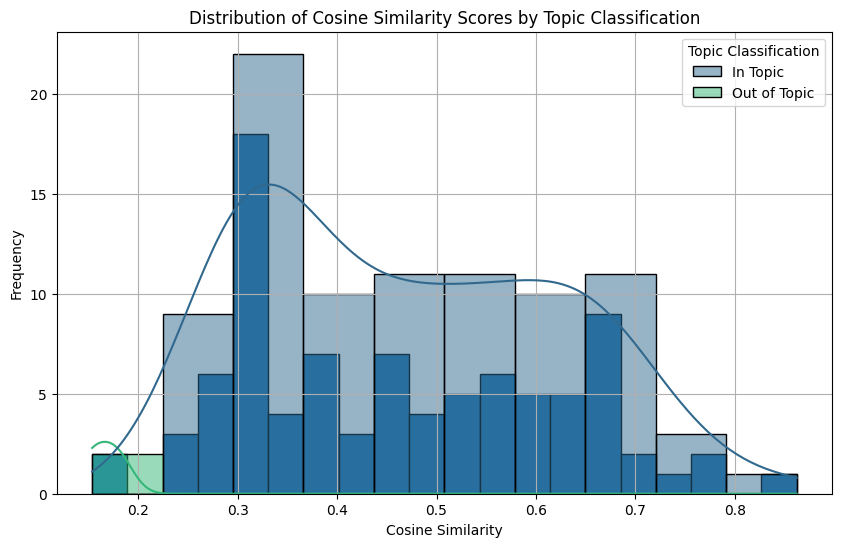

/tmp/ipython-input-43-1211084624.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts.keys()), y=list(counts.values()), palette='viridis')


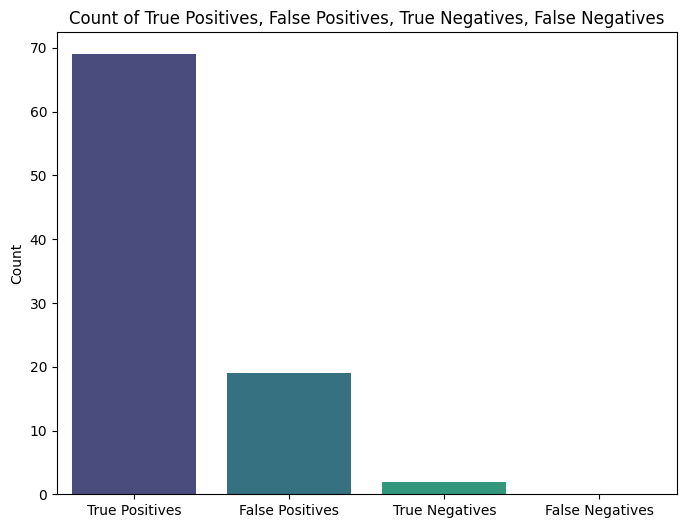

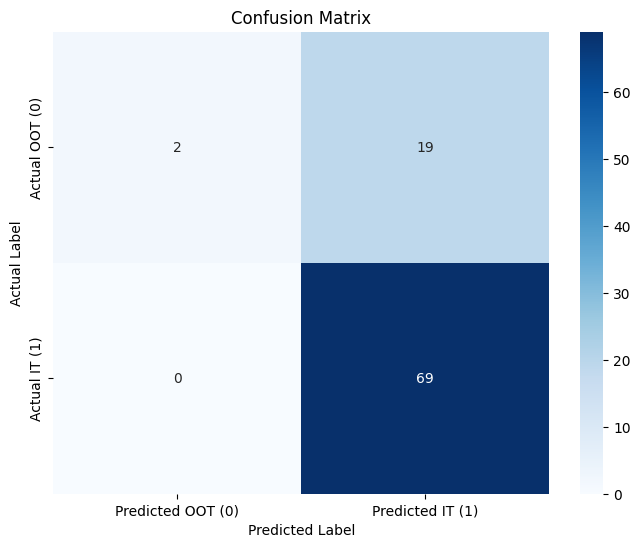

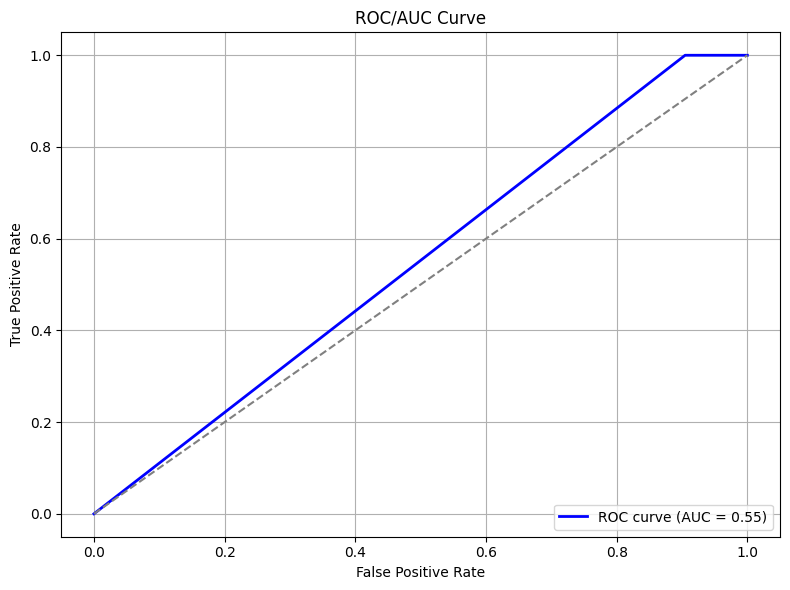

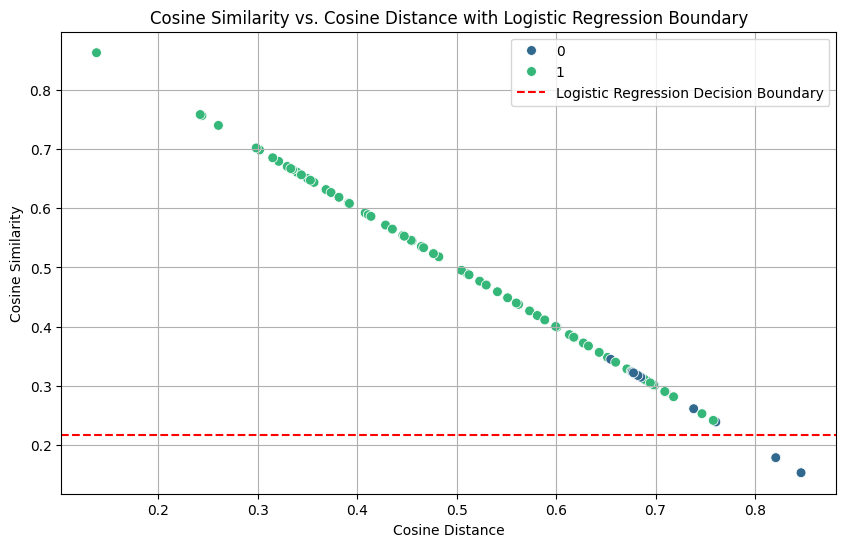

In [44]:
# Prep data
train_df= pd.DataFrame({'cos_sim': train_df_mpnet['cos_sim'],'cos_distance':train_df_mpnet['cos_distance'], 'label': train_df_mpnet['label']})
test_df= pd.DataFrame({'cos_sim': test_df_mpnet['cos_sim'],'cos_distance':test_df_mpnet['cos_distance'], 'label': test_df_mpnet['label']})

# Apply logistic regression model
model_lr = logistic_regression_model(train_df,test_df)

# Plot the logistic regression decision boundary
# For a logistic regression model trained on X = ['cos_sim'], the decision boundary is when logit = 0
# logit = beta_0 + beta_1 * cos_sim
# 0 = intercept + coef_ * cos_sim
# cos_sim = -intercept / coef_
plt.figure(figsize=(10, 6))
sns.scatterplot(data=test_df, x='cos_distance', y='cos_sim', hue='label', palette='viridis', s=50)
if len(model_lr.coef_[0]) > 0 and model_lr.coef_[0][0] != 0:
  decision_boundary_cos_sim = -model_lr.intercept_[0] / model_lr.coef_[0][0]
  # Since the decision boundary is based on cos_sim, it's a horizontal line in the cos_sim vs cos_distance plot
  # Cosine distance is 1 - cos_sim. So we can represent the boundary based on cos_sim value.
  plt.axhline(y=decision_boundary_cos_sim, color='red', linestyle='--', label='Logistic Regression Decision Boundary')

plt.xlabel('Cosine Distance')
plt.ylabel('Cosine Similarity')
plt.title('Cosine Similarity vs. Cosine Distance with Logistic Regression Boundary')
plt.legend()
plt.grid(True)
plt.show()

### Apply kmeans classifier

**Observation: ** AUC at 78% with Accuracy: 0.3333333333333333 and F1: 0.5


 ### CLUSTER CENTERS:
 [[0.60221968]
 [0.35586148]] 



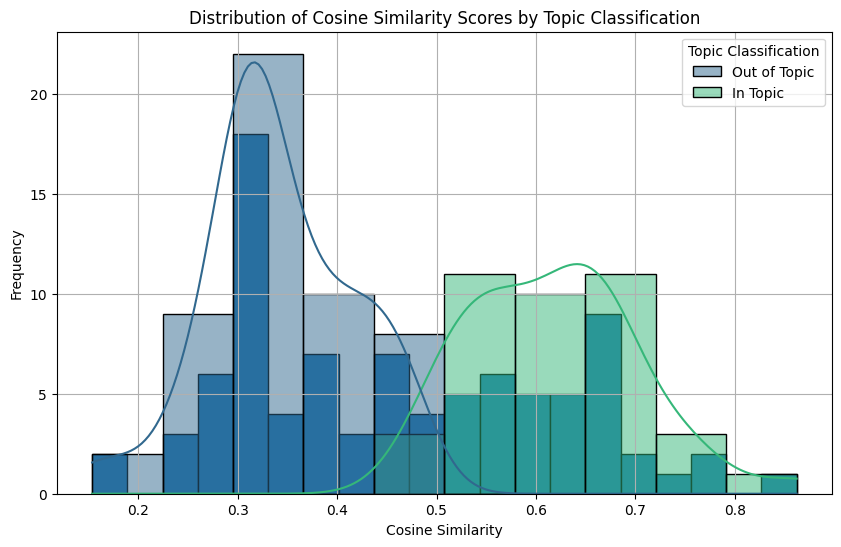

/tmp/ipython-input-43-1211084624.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts.keys()), y=list(counts.values()), palette='viridis')


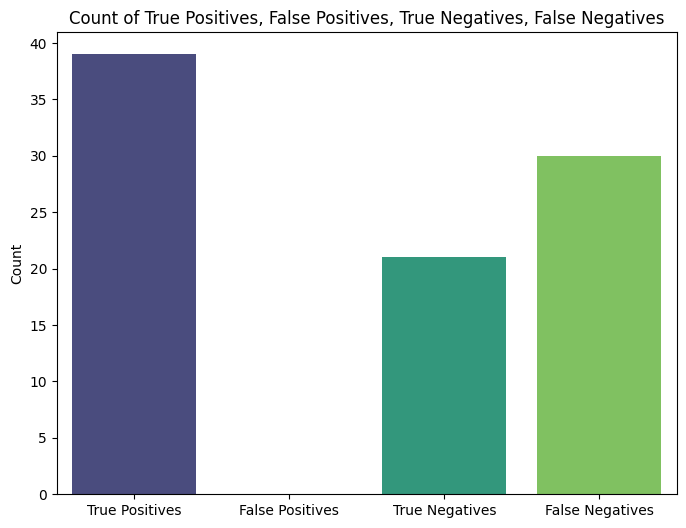

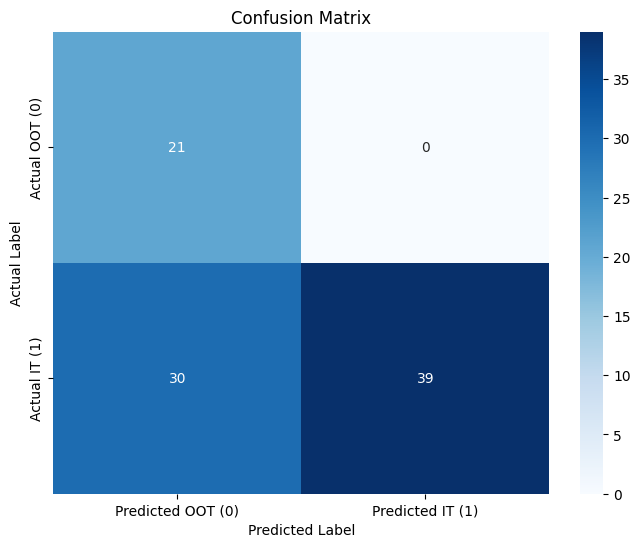

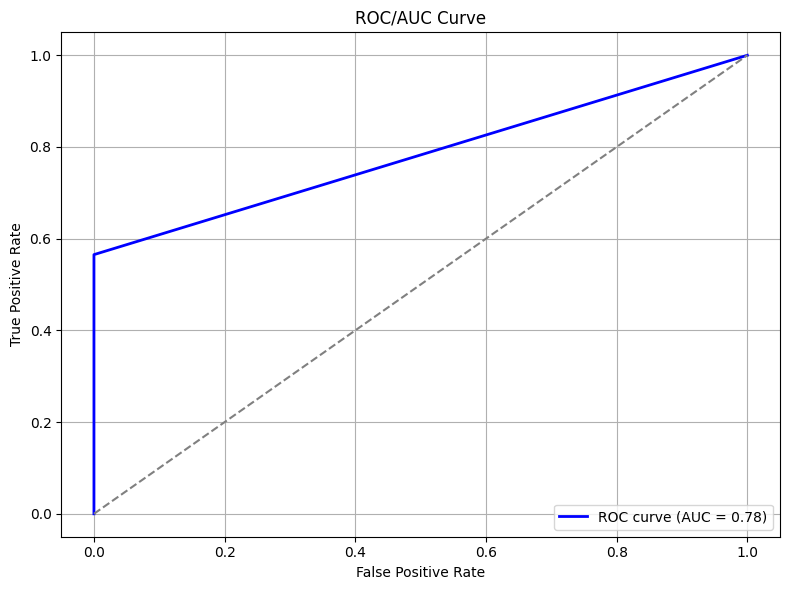

***Accuracy: 0.3333333333333333 and F1: 0.5
***Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        21
           1       0.59      0.43      0.50        69

    accuracy                           0.33        90
   macro avg       0.29      0.22      0.25        90
weighted avg       0.45      0.33      0.38        90

------------------------------------------------------------


In [45]:
# Apply kmeans to train data
centers = kmeans_model(train_df)
kmeans_class_mpnet=assign_clusters(test_df, centers)
evaluate_models(test_df['label'], kmeans_class_mpnet)

### Apply Random forest classifier

Observations:
AUC of 81% with ***Accuracy: 0.8333333333333334 and F1: 0.8872180451127819. Overlap between 0.1 to 0.7

***Accuracy: 0.8333333333333334 and F1: 0.8872180451127819
***Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.76      0.68        21
           1       0.92      0.86      0.89        69

    accuracy                           0.83        90
   macro avg       0.77      0.81      0.78        90
weighted avg       0.85      0.83      0.84        90

------------------------------------------------------------


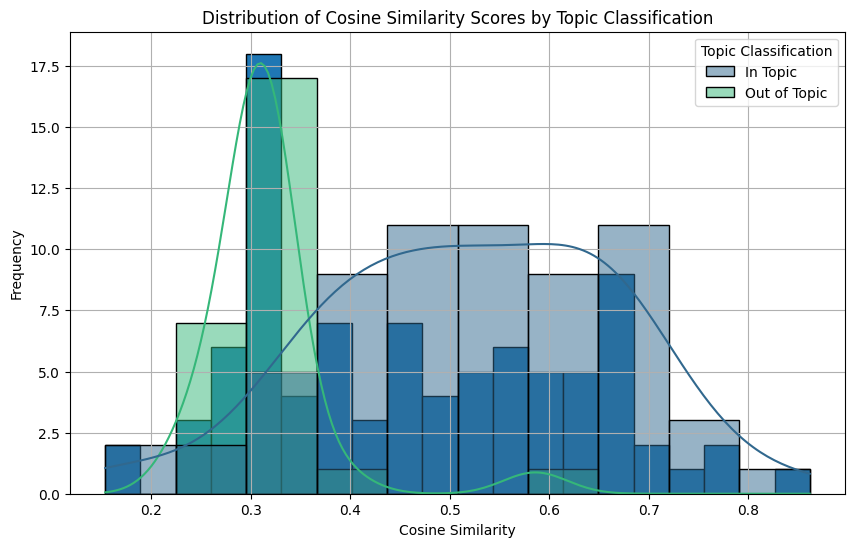

/tmp/ipython-input-43-1211084624.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts.keys()), y=list(counts.values()), palette='viridis')


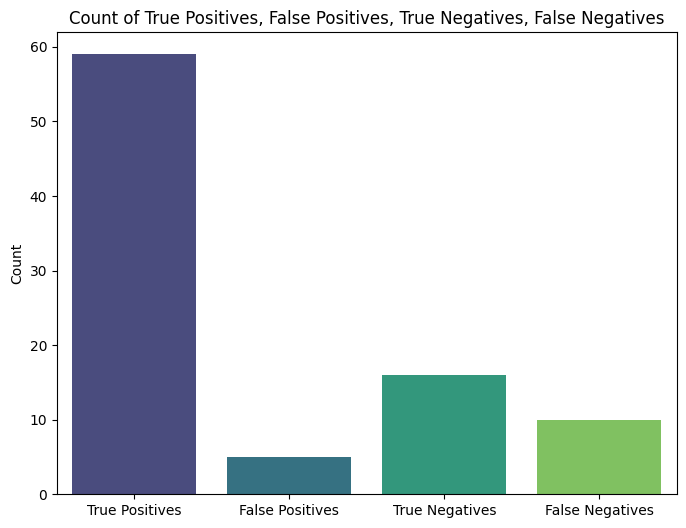

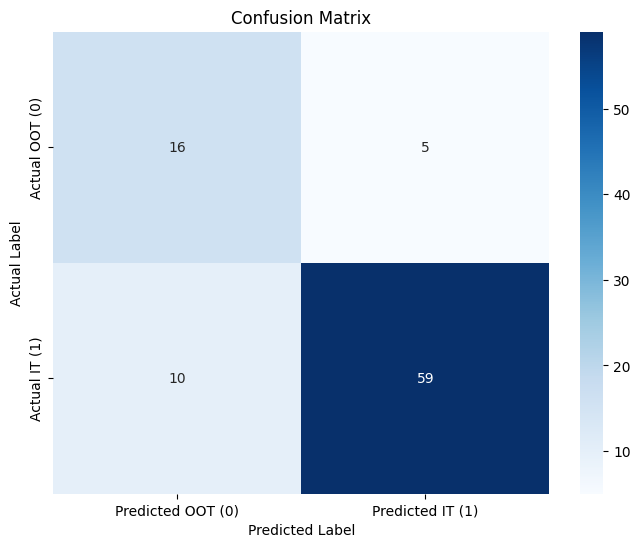

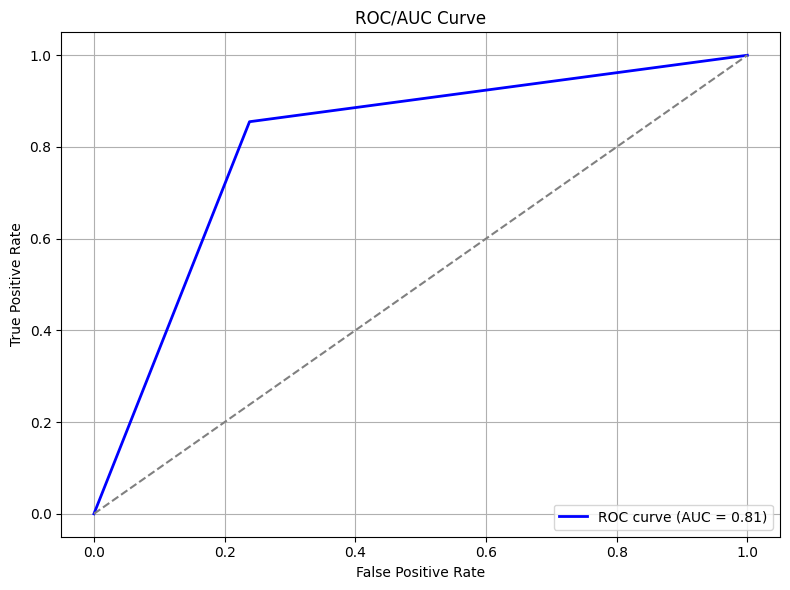

In [46]:
#Random Forest
model_rf = random_forest(train_df,test_df)

## 2. sentence-transformers/all-MiniLM-L6-v2

In [121]:
# Load model
model_minilm = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')
#Create embeddings from the vocab QA dataset
embed_minilm = create_sentence_embeddings(model_minilm, list_wz_qa)

# Create embeddings for df_human_generated_train_data
minilm_train=create_sentence_embeddings(model_minilm, orig_train_df['text'])
minilm_test=create_sentence_embeddings(model_minilm, orig_test_df['text'])

# Get the cosine similarities
#For training data
train_cos_sim_results = get_cosine_list(embed_minilm,minilm_train,orig_train_df,list_wz_qa)
train_df_minilm = pd.DataFrame(train_cos_sim_results, columns=['test_text','retrieval_id', 'cos_sim', 'cos_distance','label'])
#For test data
test_cos_sim_results = get_cosine_list(embed_minilm,minilm_test,orig_test_df,list_wz_qa)
test_df_minilm = pd.DataFrame(test_cos_sim_results, columns=['test_text','retrieval_id', 'cos_sim', 'cos_distance','label'])

# Save files
output_filepath_test = 'drive/MyDrive/ColabNotebooks/GirlEffect/sheng_project/data/training_results/test_df_minilm.csv'
output_filepath_train = 'drive/MyDrive/ColabNotebooks/GirlEffect/sheng_project/data/training_results/train_df_minilm.csv'
test_df_minilm.to_csv(output_filepath_test, index=False)
train_df_minilm.to_csv(output_filepath_train, index=False)

In [47]:
#load minilm_train.csv to df_minilm instead of re-running the model multiple times on test data

output_filepath = 'drive/MyDrive/ColabNotebooks/GirlEffect/sheng_project/data/training_results/test_df_minilm.csv'
test_df_minilm = pd.read_csv(output_filepath)
output_filepath = 'drive/MyDrive/ColabNotebooks/GirlEffect/sheng_project/data/training_results/train_df_minilm.csv'
train_df_minilm = pd.read_csv(output_filepath)

### Apply logistic regression classifier
**Observations**: AUC scored 55% with Accuracy: 0.7888888888888889 and F1: 0.8789808917197452. The decision boundary maintained at < 0.25. Recall on class 1 is 100%, and precision on Class 0 is 100%. This means it's very cautious in labeling anything as class 0.

***Accuracy: 0.7888888888888889 and F1: 0.8789808917197452
***Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.10      0.17        21
           1       0.78      1.00      0.88        69

    accuracy                           0.79        90
   macro avg       0.89      0.55      0.53        90
weighted avg       0.83      0.79      0.71        90

------------------------------------------------------------


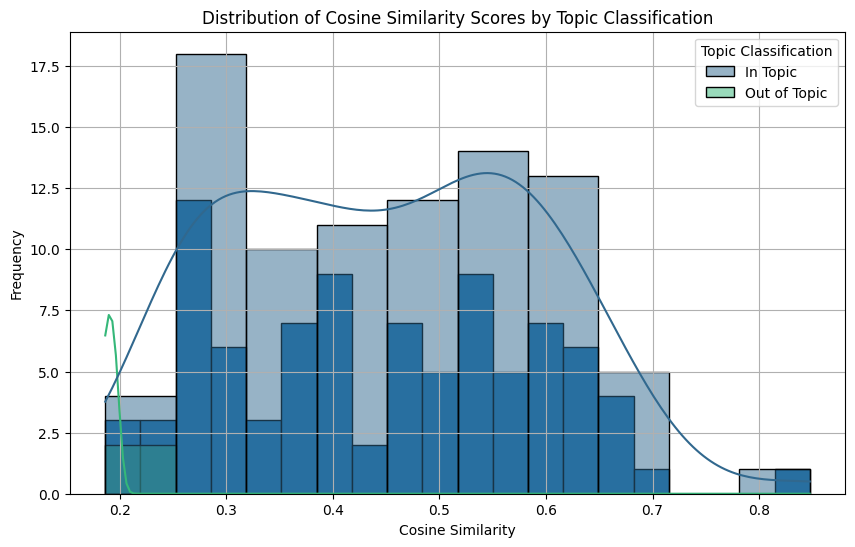

/tmp/ipython-input-43-1211084624.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts.keys()), y=list(counts.values()), palette='viridis')


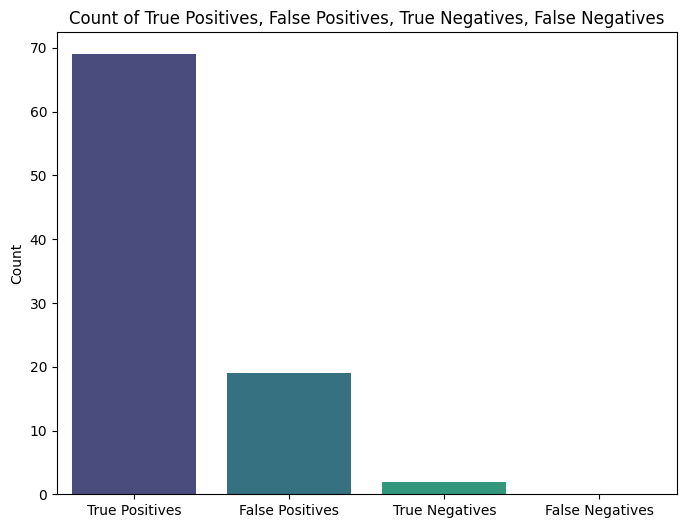

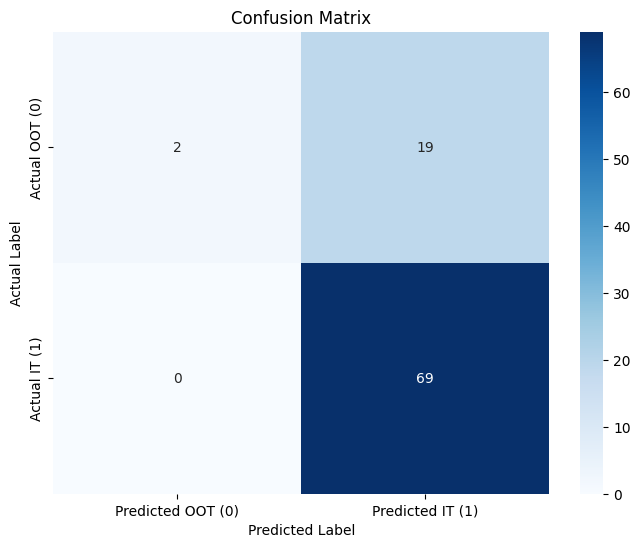

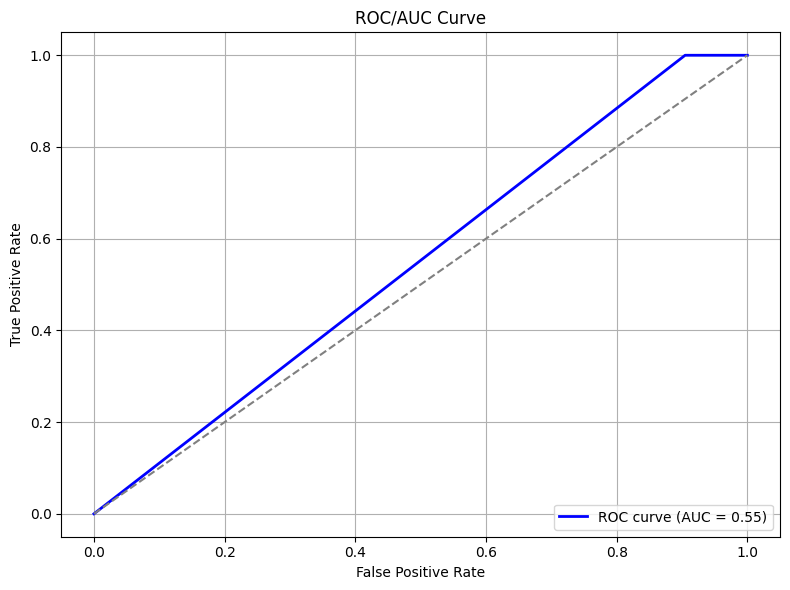

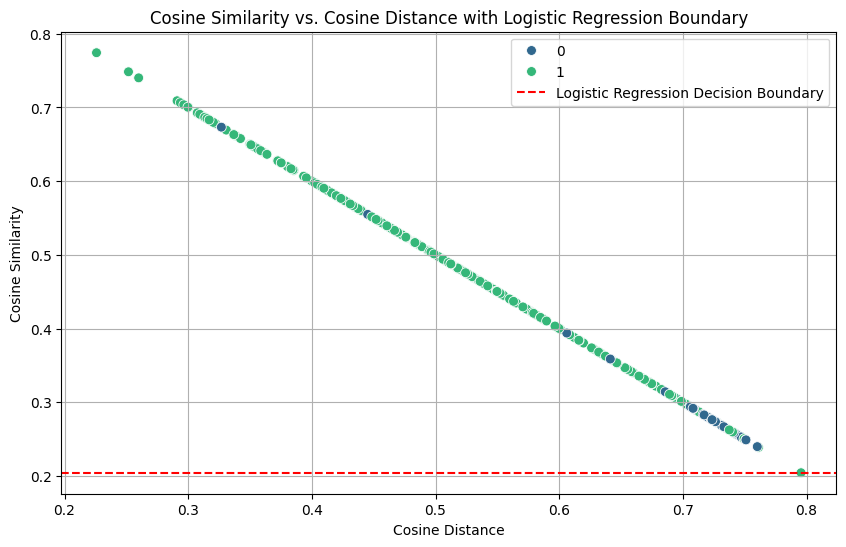

In [48]:
# Prep data
train_df= pd.DataFrame({'cos_sim': train_df_minilm['cos_sim'],'cos_distance':train_df_minilm['cos_distance'], 'label': train_df_minilm['label']})
test_df= pd.DataFrame({'cos_sim': test_df_minilm['cos_sim'],'cos_distance':test_df_minilm['cos_distance'], 'label': test_df_minilm['label']})

# Apply logistic regression model
model_lr = logistic_regression_model(train_df,test_df)

# Show logistic regression boundary
plt.figure(figsize=(10, 6))
sns.scatterplot(data=train_df, x='cos_distance', y='cos_sim', hue='label', palette='viridis', s=50)

# Plot the logistic regression decision boundary (where probability = 0.5)
# For a logistic regression model trained on X = ['cos_sim'], the decision boundary is when logit = 0
# logit = beta_0 + beta_1 * cos_sim
# 0 = intercept + coef_ * cos_sim
# cos_sim = -intercept / coef_
if len(model_lr.coef_[0]) > 0 and model_lr.coef_[0][0] != 0:
  decision_boundary_cos_sim = -model_lr.intercept_[0] / model_lr.coef_[0][0]
  # Since the decision boundary is based on cos_sim, it's a horizontal line in the cos_sim vs cos_distance plot
  # Cosine distance is 1 - cos_sim. So we can represent the boundary based on cos_sim value.
  plt.axhline(y=decision_boundary_cos_sim, color='red', linestyle='--', label='Logistic Regression Decision Boundary')

plt.xlabel('Cosine Distance')
plt.ylabel('Cosine Similarity')
plt.title('Cosine Similarity vs. Cosine Distance with Logistic Regression Boundary')
plt.legend()
plt.grid(True)
plt.show()

### Apply kmeans classifier
*Observation: *Kmeans AUC at 80%, however Accuracy: 0.28888888888888886 and F1: 0.43859649122807015. Overlap was between 0.35 and 0.5 with a high number of false Negatives



 ### CLUSTER CENTERS:
 [[0.55816381]
 [0.32245613]] 



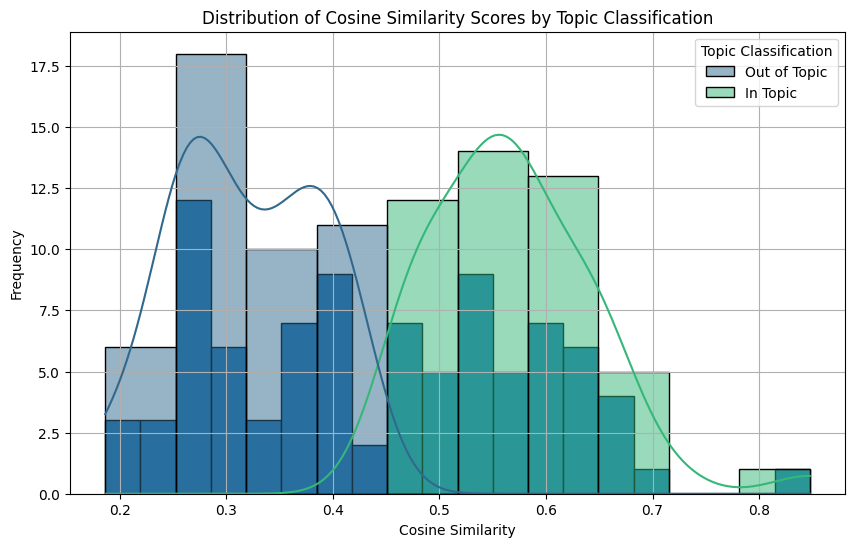

/tmp/ipython-input-43-1211084624.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts.keys()), y=list(counts.values()), palette='viridis')


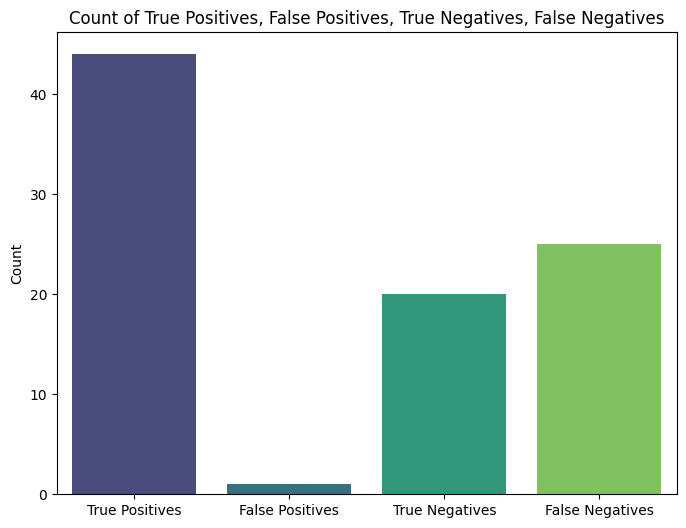

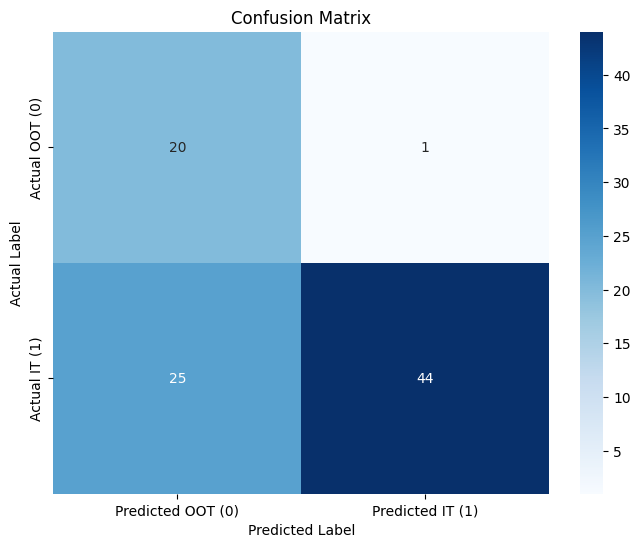

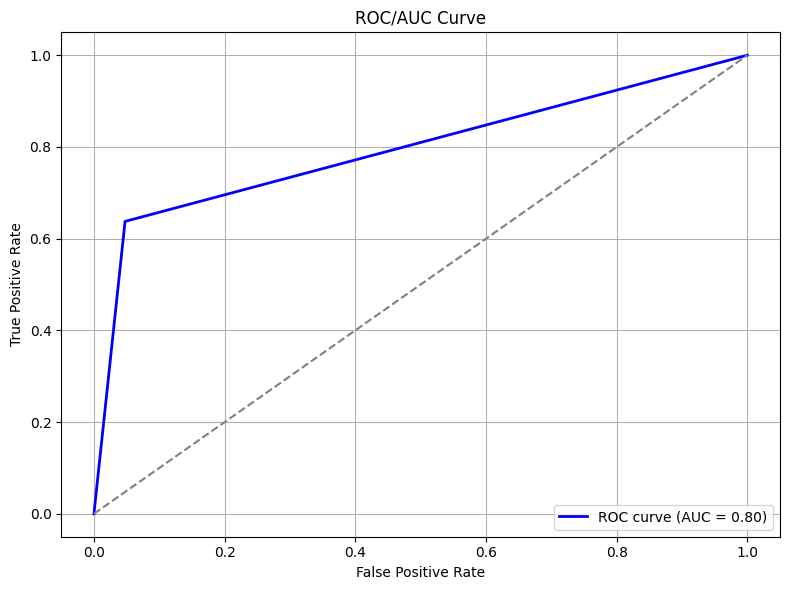

***Accuracy: 0.28888888888888886 and F1: 0.43859649122807015
***Classification Report:
               precision    recall  f1-score   support

           0       0.02      0.05      0.03        21
           1       0.56      0.36      0.44        69

    accuracy                           0.29        90
   macro avg       0.29      0.20      0.23        90
weighted avg       0.43      0.29      0.34        90

------------------------------------------------------------


In [49]:
# Apply kmeans to train data
centers = kmeans_model(train_df)
kmeans_class_minilm=assign_clusters(test_df, centers)
evaluate_models(test_df['label'], kmeans_class_minilm)

### Random forest

**Observation:** AUC 73% with Accuracy: 0.8111111111111111 and F1: 0.8776978417266187. High overlap of 0.1 - 0.7

***Accuracy: 0.8111111111111111 and F1: 0.8776978417266187
***Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.57      0.59        21
           1       0.87      0.88      0.88        69

    accuracy                           0.81        90
   macro avg       0.74      0.73      0.73        90
weighted avg       0.81      0.81      0.81        90

------------------------------------------------------------


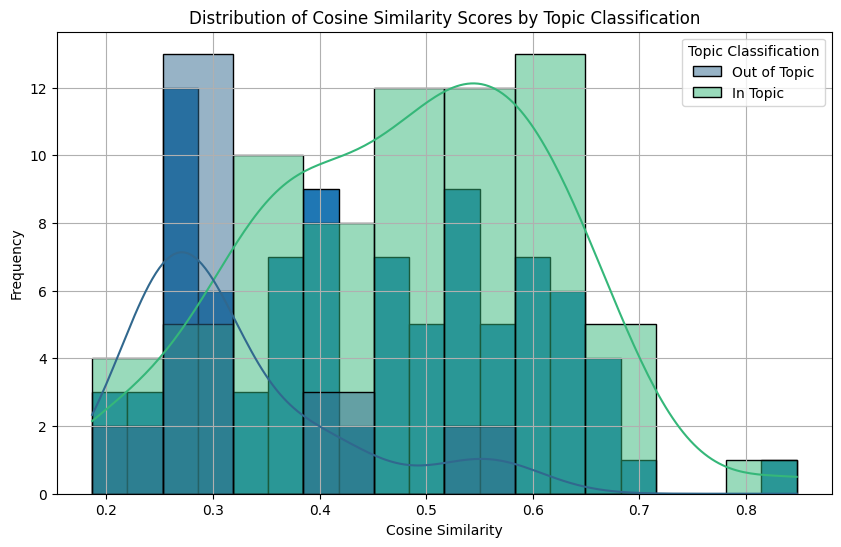

/tmp/ipython-input-43-1211084624.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts.keys()), y=list(counts.values()), palette='viridis')


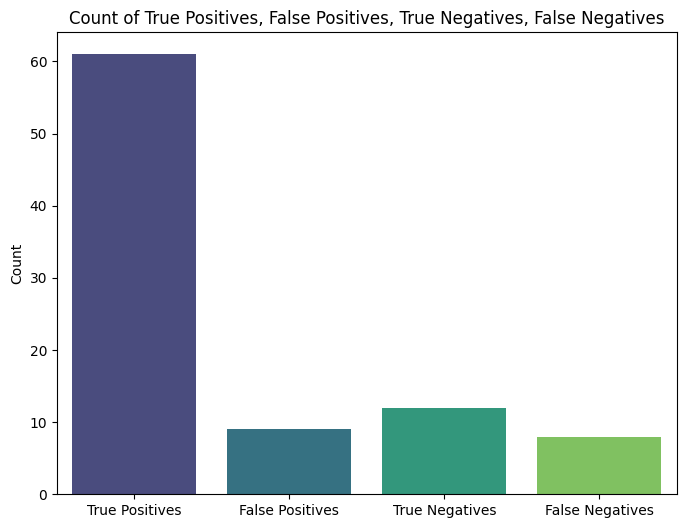

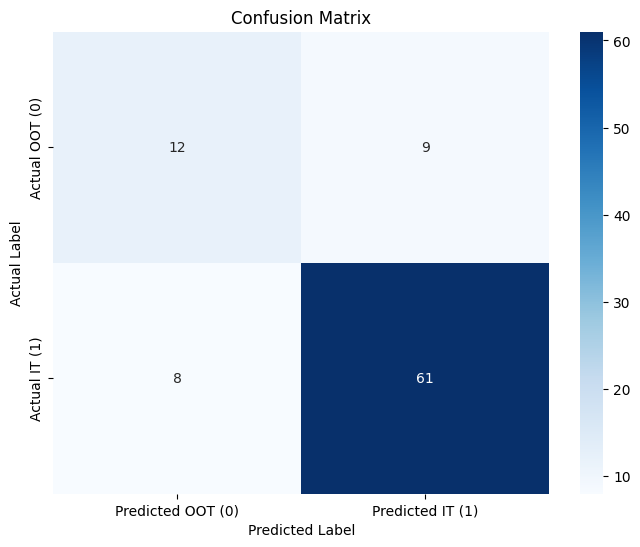

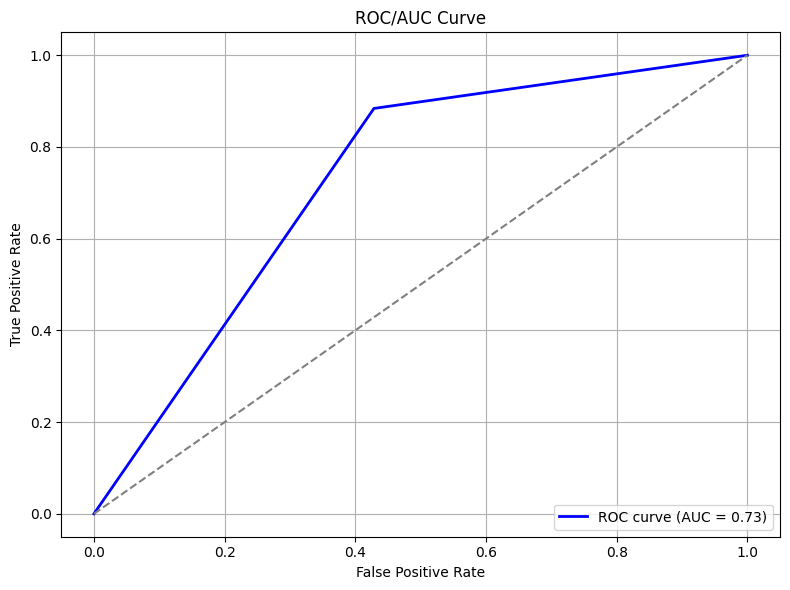

In [51]:
#Random Forest
model_rf = random_forest(train_df,test_df)

In [ ]:
import warnings
warnings.filterwarnings('ignore')

## 3. OpenAIs text-embedding-3-large


In [31]:
#KEY

from google.colab import userdata
OpenAI_API_KEY = userdata.get('OPENAI_CLIENT_KEY_SM')

def get_openai_embeddings(texts, model):
    """Gets embeddings for a list of texts using OpenAI's API."""
    client = OpenAI(api_key=OpenAI_API_KEY)
    # response = client.embeddings.create(input=texts, model=model)
    try:
        response = client.embeddings.create(input=texts, model=model)
        embeddings = [data.embedding for data in response.data]
        return embeddings
    except client.error.OpenAIError as e:
        print(f"OpenAI API Error: {e}")
        return None

# Load model
model_openai = "text-embedding-3-large" #="text-embedding-ada-002"
embed_openai=get_openai_embeddings(list_wz_qa, model_openai)

# Create embeddings for df_human_generated_train_data
openai_train=get_openai_embeddings(orig_train_df['text'], model_openai)
openai_test=get_openai_embeddings(orig_test_df['text'], model_openai)

# Get the cosine similarities
#For training data
train_cos_sim_results = get_cosine_list(embed_openai,openai_train,orig_train_df,list_wz_qa)
train_df_openai = pd.DataFrame(train_cos_sim_results, columns=['test_text','retrieval_id', 'cos_sim', 'cos_distance','label'])
#For test data
test_cos_sim_results = get_cosine_list(embed_openai,openai_test,orig_test_df,list_wz_qa)
test_df_openai = pd.DataFrame(test_cos_sim_results, columns=['test_text','retrieval_id', 'cos_sim', 'cos_distance','label'])

# Save files
output_filepath_test = 'drive/MyDrive/ColabNotebooks/GirlEffect/sheng_project/data/training_results/test_df_openai.csv'
output_filepath_train = 'drive/MyDrive/ColabNotebooks/GirlEffect/sheng_project/data/training_results/train_df_openai.csv'
test_df_openai.to_csv(output_filepath_test, index=False)
train_df_openai.to_csv(output_filepath_train, index=False)


In [52]:
#load minilm_train.csv to df_openai instead of re-running the model multiple times on test data

output_filepath = 'drive/MyDrive/ColabNotebooks/GirlEffect/sheng_project/data/training_results/test_df_openai.csv'
test_df_openai = pd.read_csv(output_filepath)
output_filepath = 'drive/MyDrive/ColabNotebooks/GirlEffect/sheng_project/data/training_results/train_df_openai.csv'
train_df_openai = pd.read_csv(output_filepath)

### Apply Logistic Regression

The overlap covered the whole data set, making it difficult to define the boundary. AUC was 65% with Accuracy: 0.8444444444444444 and F1: 0.9090909090909091. Logistic regression defined a very low decision boundary at near 0.2 thus has few if any false positives.

***Accuracy: 0.8444444444444444 and F1: 0.9090909090909091
***Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.32      0.46        19
           1       0.84      0.99      0.91        71

    accuracy                           0.84        90
   macro avg       0.85      0.65      0.69        90
weighted avg       0.85      0.84      0.81        90

------------------------------------------------------------


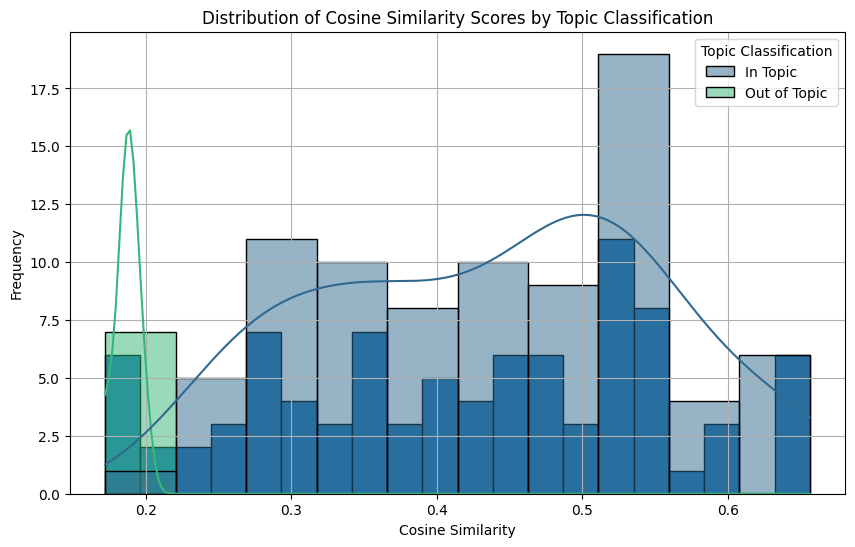

/tmp/ipython-input-43-1211084624.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts.keys()), y=list(counts.values()), palette='viridis')


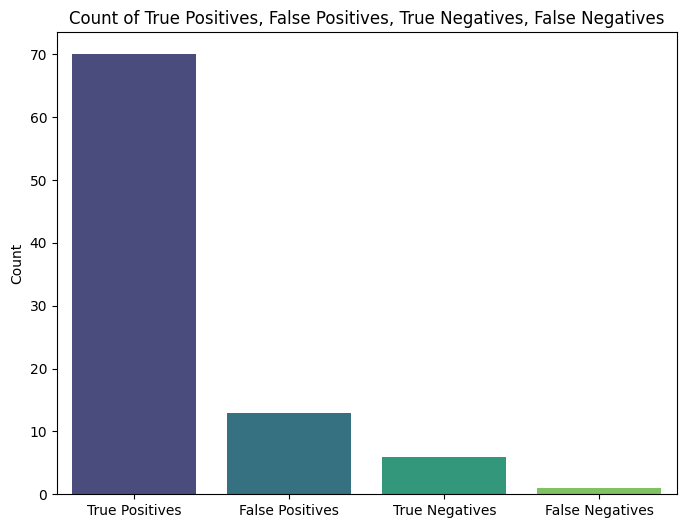

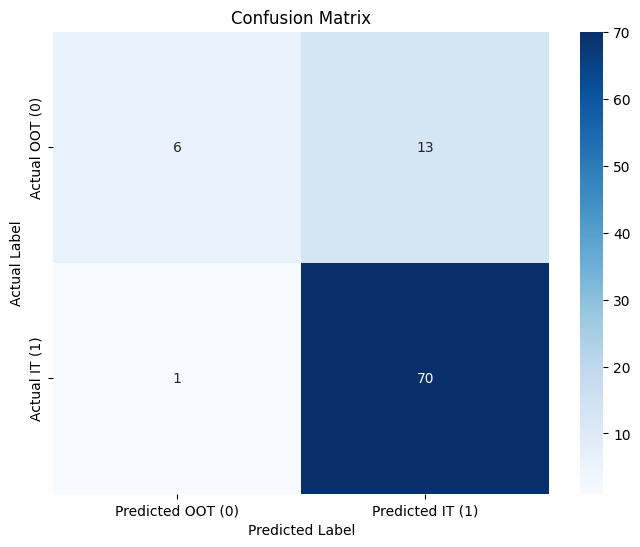

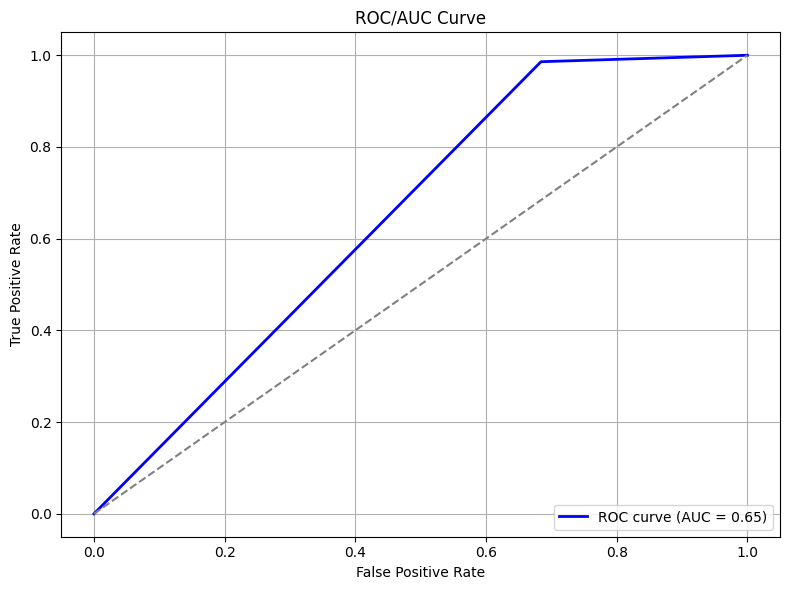

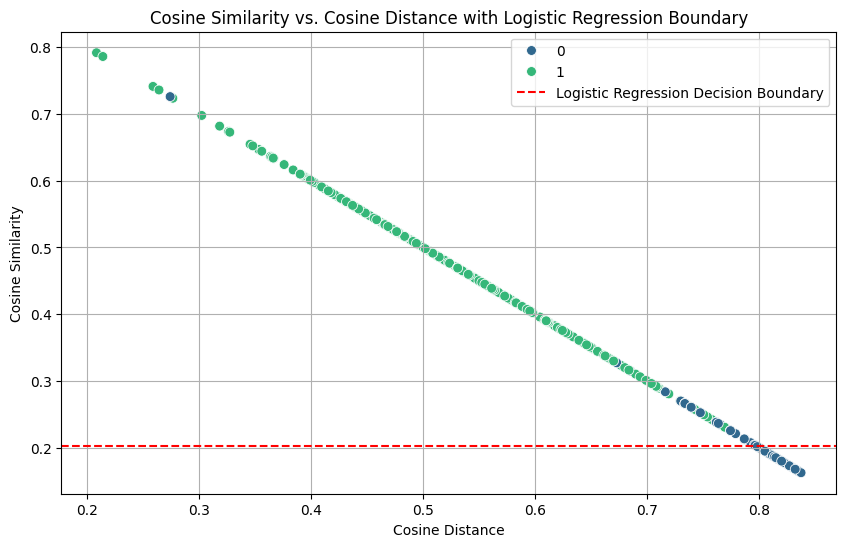

In [53]:
# Apply logistic regression model
train_df= pd.DataFrame({'cos_sim': train_df_openai['cos_sim'],'cos_distance':train_df_openai['cos_distance'], 'label': train_df_openai['label']})
test_df= pd.DataFrame({'cos_sim': test_df_openai['cos_sim'],'cos_distance':test_df_openai['cos_distance'], 'label': test_df_openai['label']})

model_lr = logistic_regression_model(train_df,test_df)

# Show logistic regression boundary
plt.figure(figsize=(10, 6))
sns.scatterplot(data=train_df, x='cos_distance', y='cos_sim', hue='label', palette='viridis', s=50)

# Plot the logistic regression decision boundary (where probability = 0.5)
# For a logistic regression model trained on X = ['cos_sim'], the decision boundary is when logit = 0
# logit = beta_0 + beta_1 * cos_sim
# 0 = intercept + coef_ * cos_sim
# cos_sim = -intercept / coef_
if len(model_lr.coef_[0]) > 0 and model_lr.coef_[0][0] != 0:
  decision_boundary_cos_sim = -model_lr.intercept_[0] / model_lr.coef_[0][0]
  # Since the decision boundary is based on cos_sim, it's a horizontal line in the cos_sim vs cos_distance plot
  # Cosine distance is 1 - cos_sim. So we can represent the boundary based on cos_sim value.
  plt.axhline(y=decision_boundary_cos_sim, color='red', linestyle='--', label='Logistic Regression Decision Boundary')

plt.xlabel('Cosine Distance')
plt.ylabel('Cosine Similarity')
plt.title('Cosine Similarity vs. Cosine Distance with Logistic Regression Boundary')
plt.legend()
plt.grid(True)
plt.show()

### Apply K-means
Observations: AUC at 21% with Accuracy: 0.7333333333333333 and F1: 0.8032, was mostly consistent.Maitained an overlap zone between 0.3-0.5.


 ### CLUSTER CENTERS:
 [[0.27008144]
 [0.51930598]] 



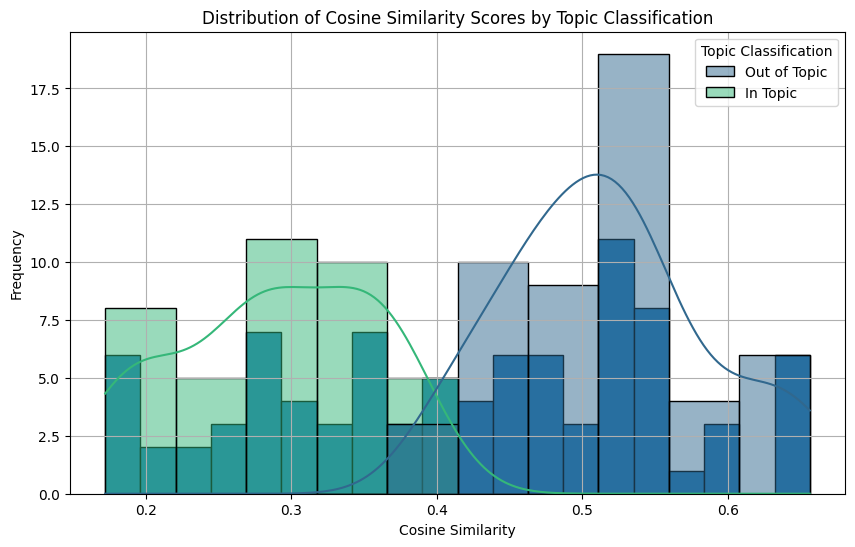

/tmp/ipython-input-43-1211084624.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts.keys()), y=list(counts.values()), palette='viridis')


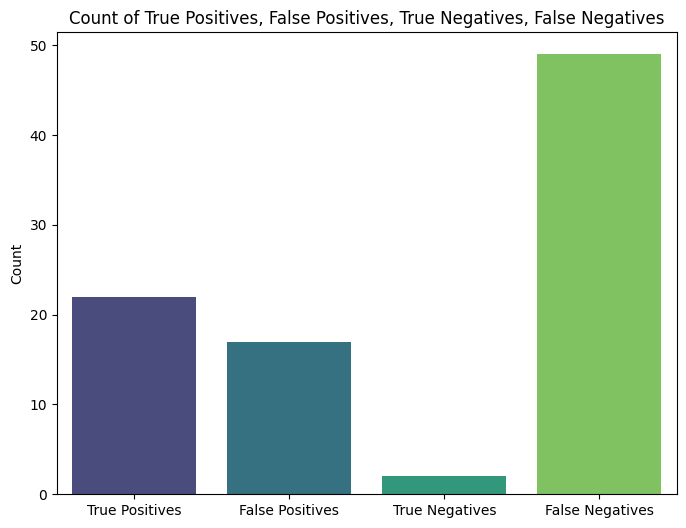

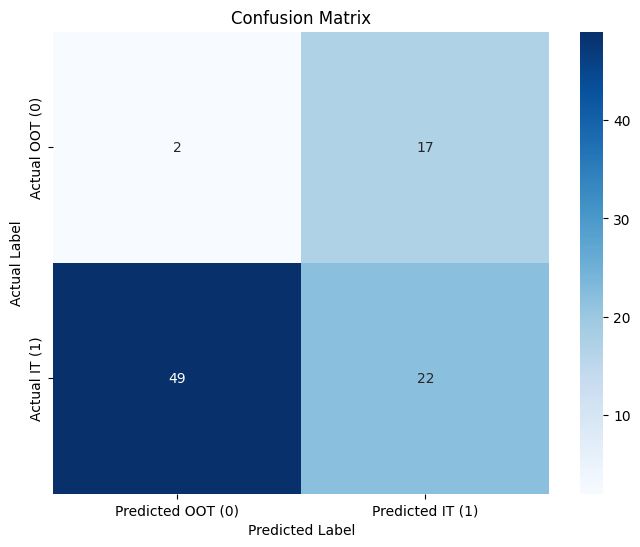

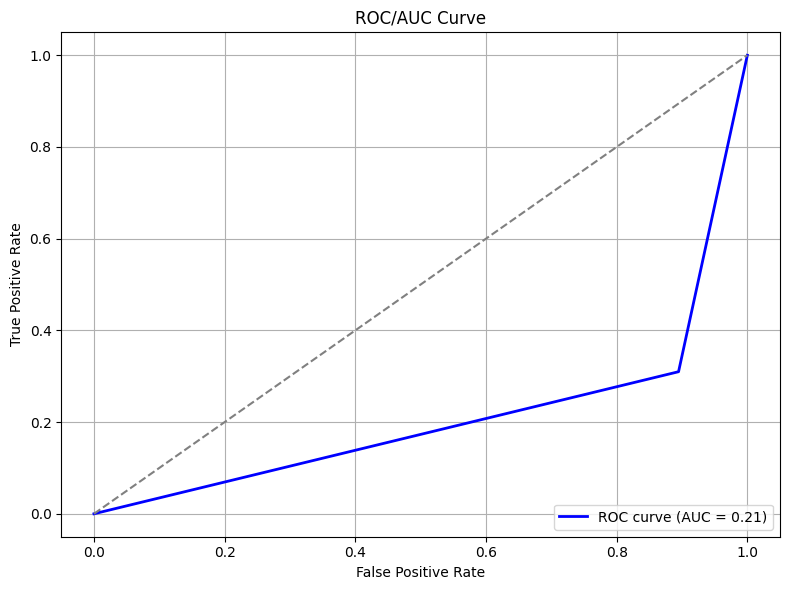

***Accuracy: 0.7333333333333333 and F1: 0.8032786885245902
***Classification Report:
               precision    recall  f1-score   support

           0       0.44      0.89      0.59        19
           1       0.96      0.69      0.80        71

    accuracy                           0.73        90
   macro avg       0.70      0.79      0.69        90
weighted avg       0.85      0.73      0.76        90

------------------------------------------------------------


In [54]:
# Apply kmeans to train data
centers = kmeans_model(train_df)
kmeans_class_openai=assign_clusters(test_df, centers)
evaluate_models(test_df['label'], kmeans_class_openai)

### Random Forest
Observations: AUC at 75% with Accuracy: 0.8444444444444444 and F1: 0.9027777777777778. Wide overlap zone between 0.0 to 0.5. On Class 1 (IT)Precision and recall at 89% and 92% respectively highlighting the model misses many class 0s but it correctly captures most class 1s.


***Accuracy: 0.8444444444444444 and F1: 0.9027777777777778
***Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.58      0.61        19
           1       0.89      0.92      0.90        71

    accuracy                           0.84        90
   macro avg       0.77      0.75      0.76        90
weighted avg       0.84      0.84      0.84        90

------------------------------------------------------------


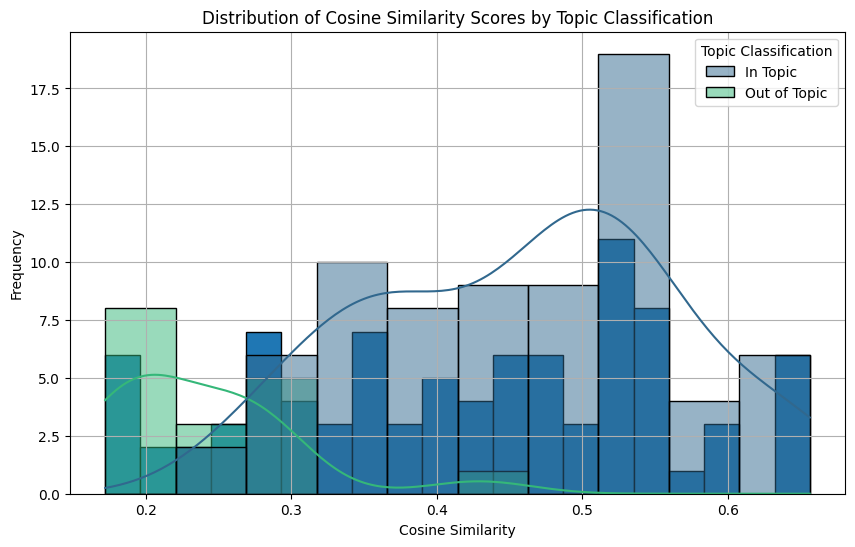

/tmp/ipython-input-43-1211084624.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts.keys()), y=list(counts.values()), palette='viridis')


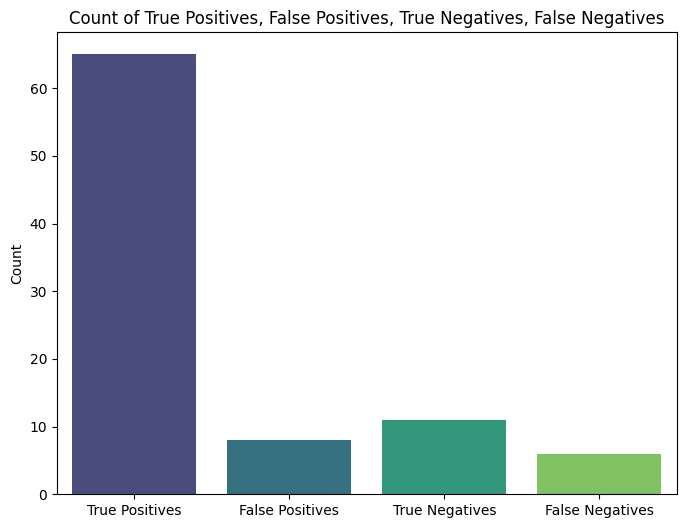

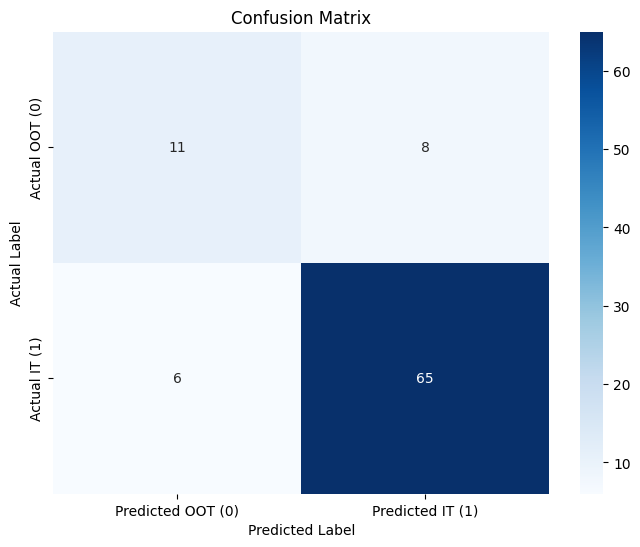

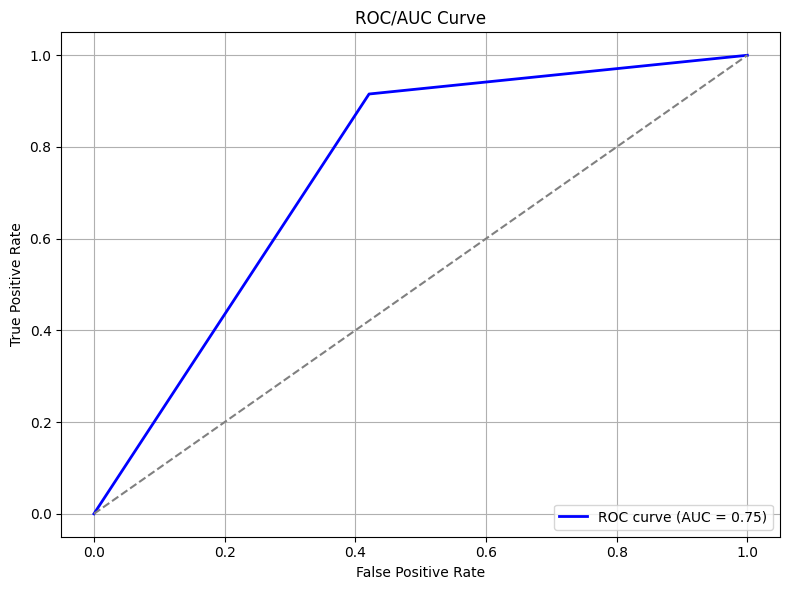

In [55]:
#Random Forest
model_rf = random_forest(train_df,test_df)

# Track 2: Multi lingual Neural Net Models

These models were trained on additional languages.Multilingual pre-training is said to be significantly better in performance hence running the models to determine performance on Sheng.

**Observations:** Despite trying several of these models the perfomance remained low at between 43% and 56% on the higher side. Thus these are not recommended for the classification problem for use in Sheng based contexts.


## Helper Functions for this track

In [13]:
def train_model(model,tokenized_train_data,tokenized_test_data):
  # Define training arguments
  training_args = TrainingArguments(
      output_dir="./results",
      eval_strategy="epoch",
      num_train_epochs=7,
      per_device_train_batch_size=4,
      per_device_eval_batch_size=4,
      learning_rate=2e-2,
      weight_decay=0.01,
      logging_dir="./logs",
      save_strategy="epoch"
  )

  # Define the Trainer
  trainer = Trainer(
      model=model,
      args=training_args,
      train_dataset=tokenized_train_data,
      eval_dataset=tokenized_test_data,
      compute_metrics=compute_metrics
  )

  # Train the model
  trainer.train()
  trainer.evaluate()
  trainer.save_model("./results")

  return trainer


# prompt: generate code for compute_metrics function

def compute_metrics(pred):
  labels = pred.label_ids
  preds = pred.predictions.argmax(-1)
  f1 = f1_score(labels, preds, average="weighted")
  acc = accuracy_score(labels, preds)
  return {"accuracy": acc, "f1": f1}

def evaluate_model_on_test_data(model, test_df):
  # Test on training set df_human_generated_train_data
  X_test_df = test_df[['text']]
  y_test_series = test_df['label']
  test_dataset_for_prediction = Dataset.from_pandas(X_test_df)

  # Tokenize the test dataset using the same preprocess function
  tokenized_test_data_for_prediction = test_dataset_for_prediction.map(preprocess_function, batched=True)

  # Predict class labels using the tokenized dataset
  predictions_output = trainer.predict(tokenized_test_data_for_prediction)
  y_pred = predictions_output.predictions.argmax(axis=-1)
  y_test = y_test_series.values

  print("Accuracy:", accuracy_score(y_test, y_pred))
  print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
  print("Classification Report:\n", classification_report(y_test, y_pred))
  print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


  # Predict class probabilities (for ROC, AUC, etc.)
  # y_probs = model.predict_proba(X_test)[:, 1]  # Prob for positive class (e.g., In Topic)
  y_probs = softmax(predictions_output.predictions, axis=-1)[:, 1]
  fpr, tpr, thresholds = roc_curve(y_test, y_probs)
  roc_auc = auc(fpr, tpr)

  plt.figure(figsize=(8,6))
  plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})', color='blue')
  plt.plot([0, 1], [0, 1], 'k--', label='Chance')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic')
  plt.legend(loc='lower right')
  plt.grid(True)
  plt.show()

## Davlan/afro-xlmr-mini

Trained on multiple african languages including swahili.

In [12]:
model_afro = AutoModelForSequenceClassification.from_pretrained("Davlan/afro-xlmr-mini")
tokenizer_afro = AutoTokenizer.from_pretrained("Davlan/afro-xlmr-mini")

# Preprocess the data
def preprocess_function(examples):
    return tokenizer_afro(examples["text"], padding="max_length", truncation=True)

# Split into train and test DataFrames (80% train, 20% test)
df_human_labeled_inference_results['human_label'] = df_human_labeled_inference_results['human_label'].astype(int)
train_df, test_df = train_test_split(df_human_labeled_inference_results, test_size=0.2, random_state=None, stratify=df_human_labeled_inference_results['human_label'])
train_dataset = Dataset.from_pandas(train_df)
test_dataset = Dataset.from_pandas(test_df)

#Rename to labels
train_dataset = train_dataset.rename_column("human_label", "labels")
test_dataset = test_dataset.rename_column("human_label", "labels")

# Tokenize the dataset
tokenized_train_data = train_dataset.map(preprocess_function, batched=True)
tokenized_test_data = test_dataset.map(preprocess_function, batched=True)
trainer = train_model(model_afro,tokenized_train_data,tokenized_test_data)


config.json:   0%|          | 0.00/721 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/472M [00:00<?, ?B/s]

Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at Davlan/afro-xlmr-mini and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/435 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

Map:   0%|          | 0/360 [00:00<?, ? examples/s]

Map:   0%|          | 0/90 [00:00<?, ? examples/s]

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: hngondoki (hngondoki-uc-berkeley) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,No log,1.198053,0.766667,0.665409
2,No log,0.574492,0.766667,0.665409
3,No log,0.605882,0.766667,0.665409


Map:   0%|          | 0/78 [00:00<?, ? examples/s]

Accuracy: 0.5
F1 Score: 0.3333333333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        39
           1       0.50      1.00      0.67        39

    accuracy                           0.50        78
   macro avg       0.25      0.50      0.33        78
weighted avg       0.25      0.50      0.33        78

Confusion Matrix:
 [[ 0 39]
 [ 0 39]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


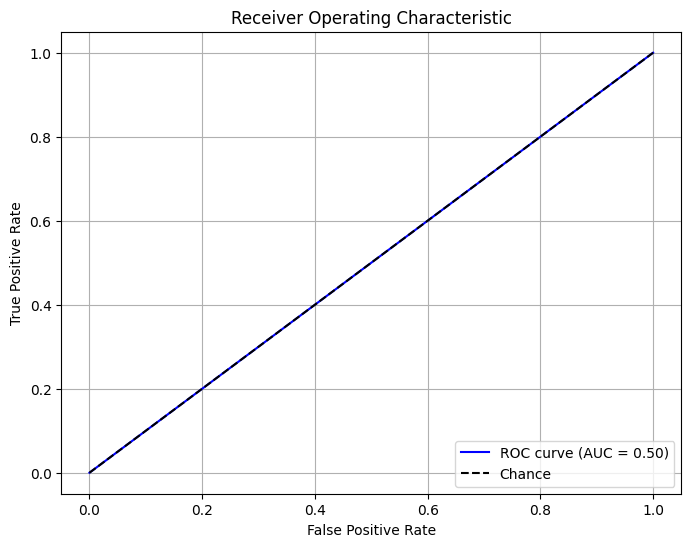

In [ ]:
#Run model on the test data df_human_generated_train_data
evaluate_model_on_test_data(trainer, test_dataset)

## facebook/mcontriever-msmarco

In [ ]:
model_fb = AutoModelForSequenceClassification.from_pretrained("facebook/mcontriever-msmarco")
tokenizer_fb = AutoTokenizer.from_pretrained("facebook/mcontriever-msmarco")

# Preprocess the data
def preprocess_function(examples):
    return tokenizer_fb(examples["text"], padding="max_length", truncation=True)

# Split into train and test DataFrames (80% train, 20% test)
train_df, test_df = train_test_split(df_human_labeled_inference_results, test_size=0.2, random_state=None, stratify=df_human_labeled_inference_results['human_label'])
train_dataset = Dataset.from_pandas(train_df)
test_dataset = Dataset.from_pandas(test_df)

#Rename to labels
train_dataset = train_dataset.rename_column("human_label", "labels")
test_dataset = test_dataset.rename_column("human_label", "labels")

# Tokenize the dataset
tokenized_train_data = train_dataset.map(preprocess_function, batched=True)
tokenized_test_data = test_dataset.map(preprocess_function, batched=True)
trainer_msmarco = train_model(model_fb,tokenized_train_data,tokenized_test_data)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at facebook/mcontriever-msmarco and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/360 [00:00<?, ? examples/s]

Map:   0%|          | 0/90 [00:00<?, ? examples/s]

Epoch,Training Loss,Validation Loss,Accuracy,F1
1,No log,2.058664,0.766667,0.665409
2,No log,0.576499,0.766667,0.665409
3,No log,0.592217,0.766667,0.665409


Map:   0%|          | 0/78 [00:00<?, ? examples/s]

Accuracy: 0.5
F1 Score: 0.3333333333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        39
           1       0.50      1.00      0.67        39

    accuracy                           0.50        78
   macro avg       0.25      0.50      0.33        78
weighted avg       0.25      0.50      0.33        78

Confusion Matrix:
 [[ 0 39]
 [ 0 39]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


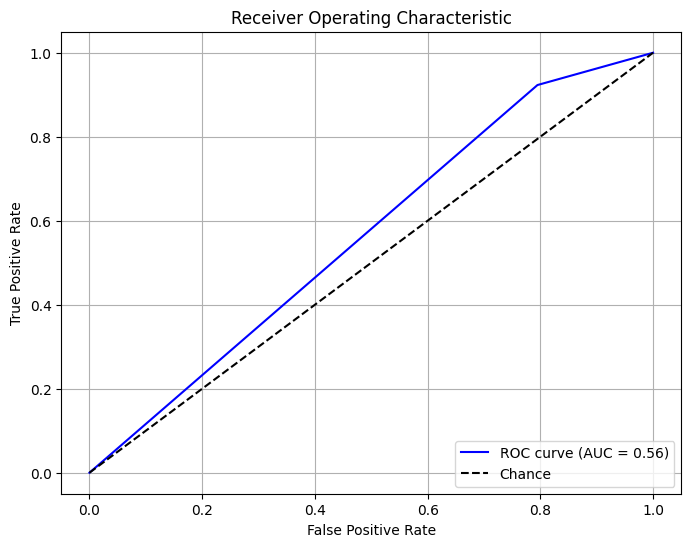

In [ ]:
#Run model on the test data df_human_generated_train_data
evaluate_model_on_test_data(trainer_msmarco, df_human_generated_train_data)

## Model facebook/contriever

In [ ]:
model_fb2 = AutoModelForSequenceClassification.from_pretrained("facebook/contriever")
tokenizer_fb2 = AutoTokenizer.from_pretrained("facebook/contriever")

# Preprocess the data
def preprocess_function(examples):
    return tokenizer_fb2(examples["text"], padding="max_length", truncation=True)

# Split into train and test DataFrames (80% train, 20% test)
train_df, test_df = train_test_split(df_human_labeled_inference_results, test_size=0.2, random_state=None, stratify=df_human_labeled_inference_results['human_label'])
train_dataset = Dataset.from_pandas(train_df)
test_dataset = Dataset.from_pandas(test_df)

#Rename to labels
train_dataset = train_dataset.rename_column("human_label", "labels")
test_dataset = test_dataset.rename_column("human_label", "labels")

# Tokenize the dataset
tokenized_train_data2 = train_dataset.map(preprocess_function, batched=True)
tokenized_test_data2 = test_dataset.map(preprocess_function, batched=True)
trainer_contriever = train_model(model_fb2,tokenized_train_data2,tokenized_test_data2)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at facebook/contriever and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/360 [00:00<?, ? examples/s]

Map:   0%|          | 0/90 [00:00<?, ? examples/s]

Epoch,Training Loss,Validation Loss,Accuracy,F1
1,No log,1.175428,0.766667,0.665409
2,No log,0.548619,0.766667,0.665409
3,No log,0.597998,0.766667,0.665409


Map:   0%|          | 0/78 [00:00<?, ? examples/s]

Accuracy: 0.5
F1 Score: 0.3333333333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        39
           1       0.50      1.00      0.67        39

    accuracy                           0.50        78
   macro avg       0.25      0.50      0.33        78
weighted avg       0.25      0.50      0.33        78

Confusion Matrix:
 [[ 0 39]
 [ 0 39]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


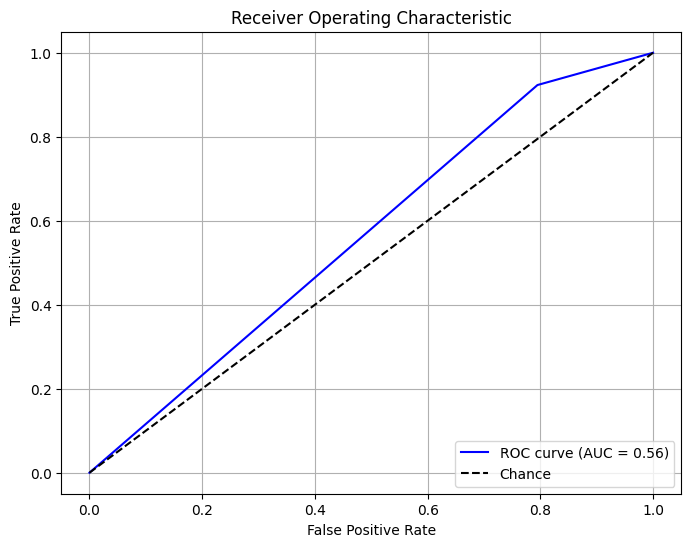

In [ ]:
#Run model on the test data df_human_generated_train_data
evaluate_model_on_test_data(trainer_contriever, df_human_generated_train_data)

## xlm-roberta-base

In [ ]:
model_xlm = AutoModelForSequenceClassification.from_pretrained("xlm-roberta-base")
tokenizer_xlm = AutoTokenizer.from_pretrained("xlm-roberta-base")

# Preprocess the data
def preprocess_function(examples):
    return tokenizer_fb(examples["text"], padding="max_length", truncation=True)

# Split into train and test DataFrames (80% train, 20% test)
train_df, test_df = train_test_split(df_human_labeled_inference_results, test_size=0.2, random_state=None, stratify=df_human_labeled_inference_results['human_label'])
train_dataset = Dataset.from_pandas(train_df)
test_dataset = Dataset.from_pandas(test_df)

#Rename to labels
train_dataset = train_dataset.rename_column("human_label", "labels")
test_dataset = test_dataset.rename_column("human_label", "labels")

# Tokenize the dataset
tokenized_train_data = train_dataset.map(preprocess_function, batched=True)
tokenized_test_data = test_dataset.map(preprocess_function, batched=True)
trainer_xlm = train_model(model_xlm,tokenized_train_data,tokenized_test_data)


config.json:   0%|          | 0.00/615 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.12G [00:00<?, ?B/s]

Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.10M [00:00<?, ?B/s]

Map:   0%|          | 0/360 [00:00<?, ? examples/s]

Map:   0%|          | 0/90 [00:00<?, ? examples/s]

Epoch,Training Loss,Validation Loss,Accuracy,F1
1,No log,4.097978,0.766667,0.665409
2,No log,0.770401,0.766667,0.665409
3,No log,0.619364,0.766667,0.665409


Map:   0%|          | 0/78 [00:00<?, ? examples/s]

Accuracy: 0.5
F1 Score: 0.3333333333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        39
           1       0.50      1.00      0.67        39

    accuracy                           0.50        78
   macro avg       0.25      0.50      0.33        78
weighted avg       0.25      0.50      0.33        78

Confusion Matrix:
 [[ 0 39]
 [ 0 39]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


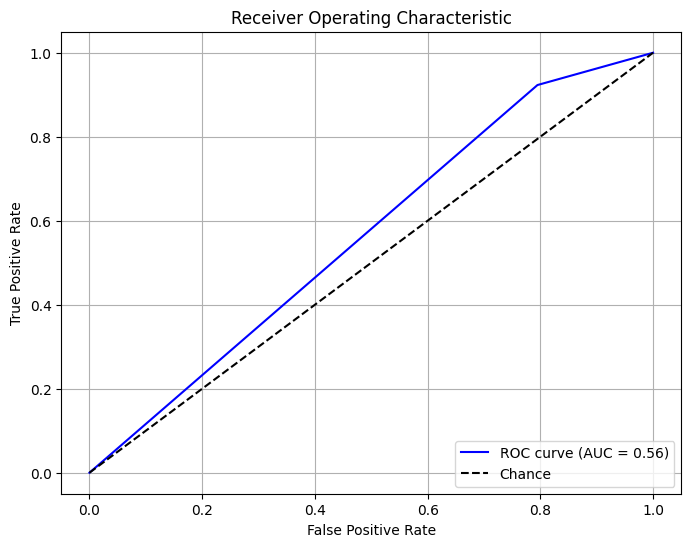

In [ ]:
#Run model on the test data df_human_generated_train_data
evaluate_model_on_test_data(trainer_xlm, df_human_generated_train_data)

## sentence-transformers/LaBSE

In [ ]:
model_labse = AutoModelForSequenceClassification.from_pretrained("sentence-transformers/LaBSE")
tokenizer_labse = AutoTokenizer.from_pretrained("sentence-transformers/LaBSE")

# Preprocess the data
def preprocess_function(examples):
    return tokenizer_labse(examples["text"], padding="max_length", truncation=True)

# Split into train and test DataFrames (80% train, 20% test)
train_df, test_df = train_test_split(df_human_labeled_inference_results, test_size=0.2, random_state=None, stratify=df_human_labeled_inference_results['human_label'])
train_dataset = Dataset.from_pandas(train_df)
test_dataset = Dataset.from_pandas(test_df)

#Rename to labels
train_dataset = train_dataset.rename_column("human_label", "labels")
test_dataset = test_dataset.rename_column("human_label", "labels")

# Tokenize the dataset
tokenized_train_data = train_dataset.map(preprocess_function, batched=True)
tokenized_test_data = test_dataset.map(preprocess_function, batched=True)
trainer_labse = train_model(model_labse,tokenized_train_data,tokenized_test_data)


config.json:   0%|          | 0.00/804 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.88G [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at sentence-transformers/LaBSE and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/397 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/5.22M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.62M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Map:   0%|          | 0/360 [00:00<?, ? examples/s]

Map:   0%|          | 0/90 [00:00<?, ? examples/s]

Epoch,Training Loss,Validation Loss,Accuracy,F1
1,No log,0.810086,0.233333,0.088288
2,No log,1.113975,0.233333,0.088288
3,No log,0.547500,0.766667,0.665409


In [ ]:
#Run model on the test data df_human_generated_train_data
evaluate_model_on_test_data(trainer_labse, df_human_generated_train_data)

Map:   0%|          | 0/78 [00:00<?, ? examples/s]

RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


# Track 3: Few shot using OpenAI
**Observation:**  This track experimented on the efficacy of few-shot learning using OpenAI's language models. The approach demonstrated consistently high performance, with accuracy and F1 scores reaching up to 91%. Notably, the model exhibited strong generalization capabilities with Sheng - a low resource language.

In [ ]:
def openai_train(df):
  client = OPENAI_CLIENT_KEY

  X = df['text']
  y = df['label']
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)
  train_df = pd.DataFrame({'text': X_train, 'label': y_train})
  test_df = pd.DataFrame({'text': X_test})

  predictions=openai_classification(train_df,X_test)
  return predictions,y_test

def openai_classification(train_df,X_test):
  client = OPENAI_CLIENT_KEY
  predictions = []
  for item in X_test:
    prompt = f"""
    Classify the following sentences as In Topic if they are about sexual reproductive health in adolescents,
    or Out of Topic if they are about other unrelated topics.
    Use the examples of sentences are {train_df.to_dict(orient='records')} to classify the following
    sentences {item} and return comma separated list of predictions as either
    1 for IT or 0 for OOT for each of the test sentences.

    """

    response = client.completions.create(
      model="gpt-3.5-turbo-instruct",
      prompt=prompt,
      max_tokens=5,
      temperature=0  # deterministic
    )
    classification=response.choices[0].text.strip()
    classification=classification.split(',')
    classification = [1 if '1' in item or 'IT' in item or 'In Topic' in item else 0 for item in classification if item]
    max_val = max(classification)
    predictions.append(int(max_val))

    # print(item,"-", item, "Prediction:", response.choices[0].text.strip())

  return predictions

In [ ]:
# Run OpenAI on train data
y_pred,y_test=openai_train(df_human_generated_train_data)
evaluate_models(y_test, y_pred)

***Accuracy: 0.75 and F1: 0.3333333333333333
***Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85        13
           1       0.33      0.33      0.33         3

    accuracy                           0.75        16
   macro avg       0.59      0.59      0.59        16
weighted avg       0.75      0.75      0.75        16

------------------------------------------------------------


In [ ]:
# Run OpenAI on small test data
y_pred=openai_classification(df_human_generated_train_data, df_small_test_data['text'])
evaluate_models(df_small_test_data['label'],y_pred)
for i in range(len(df_small_test_data['text'])):
  print(f"{df_small_test_data['text'][i]}: prediction: {y_pred[i]} :label:{df_small_test_data['label'][i]}")

***Accuracy: 1.0 and F1: 1.0
***Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         6

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10

------------------------------------------------------------
Risks za kumiss a pill ni: prediction: 1 :label:1
Nataka kuhave sex, nianze wapi?: prediction: 1 :label:1
Lazima mtu ahave sex na boy?: prediction: 1 :label:1
Story ya family planning niaje: prediction: 1 :label:1
Ikifeel peer pressure ni lazima?: prediction: 1 :label:1
Sitaki ball, nido?: prediction: 1 :label:1
Niambie vile nitapass exams.: prediction: 0 :label:0
Kutembea ni exercise poa?: prediction: 0 :label:0
Mtu anatafuta job wapi siku hizi?: prediction: 0 :label:0
Janta ya prezzy ni noma: prediction: 0 :label:0


# Track 4: Translation to English
Translate text to eng, get cosine similarity and use logistic regression to classify.
**Observation:** Despite the transformation, accuracy and F1 remained below 50%, suggesting translation introduced semantic drift(change or distortion in the meaning of a word, phrase, or sentence when it's transformed ) without improving decision boundary clarity.

## Experiment 1: Sheng to English translations using OpenAI

1. Check cosine similarity and use logistic regression for classification

2. Use OpenAI to classify text

### Helper Functions

In [ ]:
# Translation using OpenAI

def translate_text(text, target_language="en"):
    client = OPENAI_CLIENT_KEY
    response = client.completions.create(
        model="gpt-3.5-turbo-instruct",
        prompt=f"Translate the following Swahili text to {target_language}:\n\n{text}",
        max_tokens=150,
        n=1,
        stop=None,
        temperature=0.5,
    )
    translated_text = response.choices[0].text.strip()
    return translated_text

def batch_translate_text(text_batch, target_language="en"):
    # Translate text to using open ai
    translated_texts = []
    # client = OpenAI(
    #     api_key = os.getenv("OPENAI_API_KEY"),
    # )
    # completion = client.completions.create
    for text in text_batch:
        try:
            translated_text = translate_text(text,target_language)
            translated_texts.append(translated_text)
        except Exception as e:
            print(f"Error translating text '{text}': {e}")
            translated_texts.append(None)  # Or handle the error as needed
    return translated_texts

In [ ]:
# Take the test set and translate to eng
sw_eng_train_data=batch_translate_text(df_human_generated_train_data['text'], target_language="en")

In [ ]:
sw_eng_train_data

['I have been told about the stories of the manosphere, I should go and find these people.',
 'My friend is jealous.',
 'What is STI?',
 "This is a swamp, I can't walk, call the police to help us.",
 '"How much is the house?"',
 'If I wear ill-fitting clothes, can I go to the market?',
 'What age is good to start with a boy?',
 'My teacher is cutting me, right?',
 'Where will I get P2?',
 'Where should I go if I want to rest?',
 'Why do girls smell in their privates?',
 'I am hungry.',
 'I want manifestation of wealth and abundance.',
 'I am in love with a guy in my neighborhood, how should I tell him?',
 'Life is hard, how are you living?',
 'Are you happy at your job?',
 'Why are you quiet?',
 'I am an entrepreneur and I am facing business challenges.',
 "My mother doesn't listen to me about the matters of madams.",
 'My lady has left me.',
 'Do I have to drive?',
 'I want to study, are there any scholarships?',
 'I am used to watching pornography.',
 'I am sure I have made a small m

In [ ]:
df_wz_eng_labeled


,question,label
67,Oh sis well I've problem with my Boyfriend we ...,1
80,Can you give me an advice on careers,0
2,https://www.facebook.com/reel/386361923726645?...,0
60,Im a widow at age of 35 i need help to heal,1
99,WHAT is the Difference between Factor market a...,0
...,...,...
76,How to have sex with a girl ?,1
74,How to tell someone you are having a crush on ...,1
20,I tested negative for pregnancy but something'...,1
32,I am asking you because I have a homework,0


In [ ]:
def get_openai_embeddings(texts, model):
    """Gets embeddings for a list of texts using OpenAI's API."""
    try:
        response = OPENAI_CLIENT_KEY.embeddings.create(input=texts, model=model)
        embeddings = [data.embedding for data in response.data]
        return embeddings
    except openai.error.OpenAIError as e:
        print(f"OpenAI API Error: {e}")
        return None

In [ ]:
model_openai = "text-embedding-3-large" #="text-embedding-ada-002"
embed_openai=get_openai_embeddings(df_wz_eng_labeled['question'].tolist(), model_openai)
embed_openai_train=get_openai_embeddings(sw_eng_train_data, model_openai)

### 1. Check cosine similarity and use logistic regression for classification
**Observation:** translation of sheng to eng results to poor synatic and semantic meanings of text hence poort accuracy when compare to english vocab.

In [ ]:
sw_eng_train = get_cosine_list(embed_openai,embed_openai_train,df_human_generated_train_data['text'],df_wz_eng_labeled)
sw_eng_train_cos_list = pd.DataFrame(sw_eng_train, columns=['text','retrieval_id', 'cos_sim', 'cos_distance'])


***Accuracy: 0.4375 and F1: 0.47058823529411764
***Classification Report:
               precision    recall  f1-score   support

           0       0.43      0.38      0.40         8
           1       0.44      0.50      0.47         8

    accuracy                           0.44        16
   macro avg       0.44      0.44      0.44        16
weighted avg       0.44      0.44      0.44        16

------------------------------------------------------------


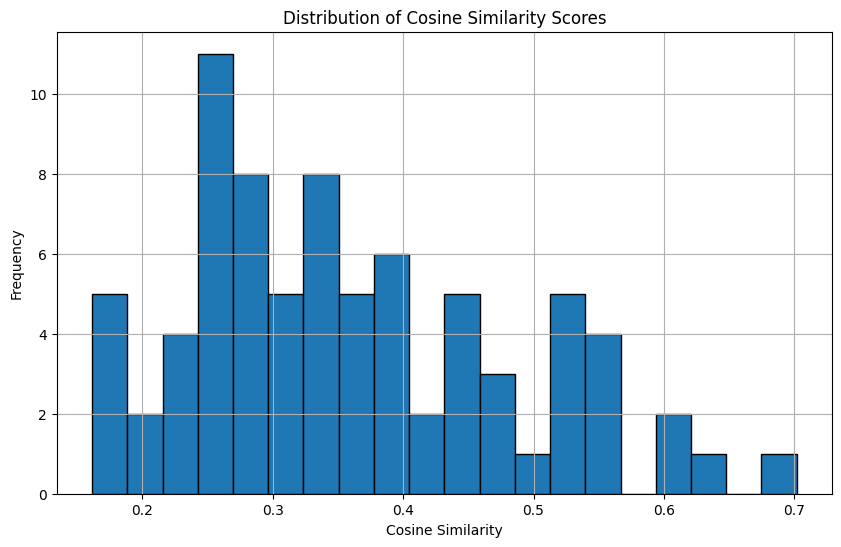

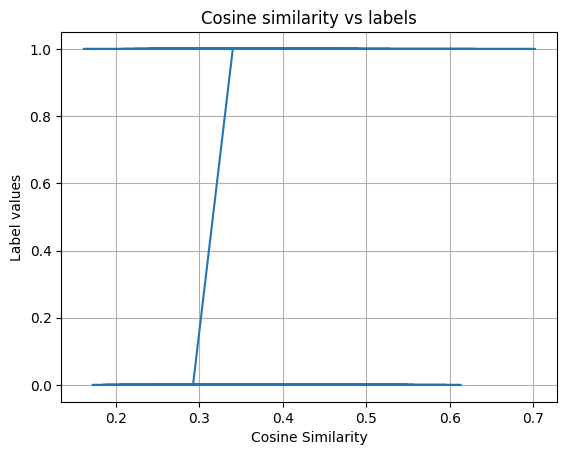

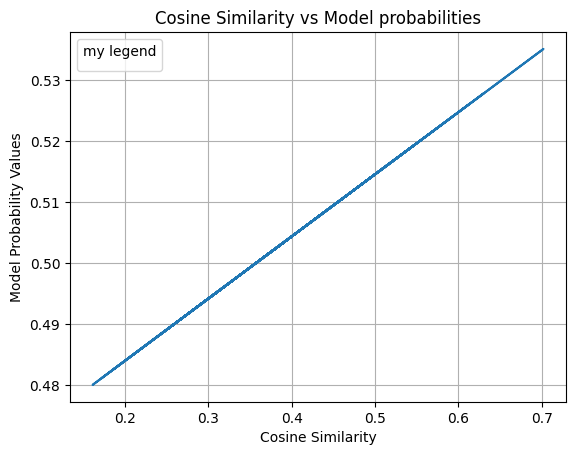

In [ ]:
train_df= pd.DataFrame({'cos_sim': sw_eng_train_cos_list['cos_sim'], 'label': df_human_generated_train_data['label']})
model_lr = logistic_regression_model(train_df)

# [Experiment 2 link document is here](https://https://colab.research.google.com/drive/1uNpX__Ndf6A6WIPXn5j8MrtbdqPvLvhb?usp=drive_link)

The second experiment was conducted in a separate Jupyter notebook to enable reuse of the existing codebase from this main document.